<a href="https://colab.research.google.com/github/youngpaper1115/Cable_TV_churnout/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L사 고객 데이터 분석을 통한 이탈율 예측

## 00. 데이터 불러오기 / 필요 라이브러리 임포트

In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
import os

path = os.getcwd()
print(path)

/home/ljy1115


### raw data 불러오기

In [ ]:
data  = pd.read_csv('/home/ljy1115/project/digital_user_check_202205201338.csv',sep='|')

In [ ]:
data.head()

,SVC_USE_DAYS_GRP,Unnamed: 1,MEDIA_NM_GRP,Unnamed: 3,PROD_NM_GRP,Unnamed: 5,PROD_OLD_YN,Unnamed: 7,AGMT_KIND_NM,Unnamed: 9,STB_RES_1M_YN,Unnamed: 11,SVOD_SCRB_CNT_GRP,Unnamed: 13,PAID_CHNL_SCRB_CNT_GRP,Unnamed: 15,SCRB_PATH_NM_GRP,Unnamed: 17,AGMT_END_SEG,Unnamed: 19,AGMT_END_YMD,Unnamed: 21,TOTAL_USED_DAYS,Unnamed: 23,TV_SCRB,Unnamed: 25,ANALOG_SCRB,Unnamed: 27,DIGITAL_SCRB,Unnamed: 29,TOTAL_INTERNET_SCRB,Unnamed: 31,GIGA_INTERNET_SCRB,Unnamed: 33,BUNDLE_YN,Unnamed: 35,DIGITAL_GIGA_YN,Unnamed: 37,DIGITAL_ALOG_YN,Unnamed: 39,TV_I_CNT,Unnamed: 41,VOC_TOTAL_MONTH1_YN,Unnamed: 43,EMAIL_RECV_CLS_NM,Unnamed: 45,SMS_SEND_CLS_NM,Unnamed: 47,CH_HH_AVG_MONTH1,Unnamed: 49,CH_TMS_1_2_INCREASE_YN,Unnamed: 51,CH_FAV_RANK1,Unnamed: 53,KIDS_USE_PV_MONTH1,Unnamed: 55,KIDS_USE_YN_MONTH1,Unnamed: 57,KIDS_VOD_CNT_MONTH1,Unnamed: 59,TOT_AMT_MONTH1,Unnamed: 61,TOT_AMT_3MM,Unnamed: 63,NFX_USE_YN,Unnamed: 65,YTB_USE_YN,Unnamed: 67,canel_yn
0,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,0건,NaN,1건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20181013,NaN,2453,NaN,2,NaN,0,NaN,2,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,2.0,NaN,N,NaN,수신,NaN,수신,NaN,13.77,NaN,비슷,NaN,기타,NaN,0.0,NaN,N,NaN,0.0,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
1,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20170804,NaN,2611,NaN,5,NaN,0,NaN,5,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,5.0,NaN,N,NaN,수신,NaN,수신,NaN,5.80,NaN,비슷,NaN,기타,NaN,0.0,NaN,N,NaN,0.0,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
2,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,약정승계,NaN,Y,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20171030,NaN,2526,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,1.0,NaN,N,NaN,수신,NaN,수신,NaN,0.00,NaN,비슷,NaN,기타,NaN,0.0,NaN,N,NaN,0.0,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
3,36개월 이상,NaN,UHD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,1건,NaN,0건,NaN,일반상담,NaN,약정 만료 전 12개월이상,NaN,20230204,NaN,3851,NaN,3,NaN,0,NaN,3,NaN,1,NaN,0,NaN,Y,NaN,N,NaN,N,NaN,4.0,NaN,N,NaN,수신,NaN,수신,NaN,6.43,NaN,감소,NaN,기타,NaN,0.0,NaN,N,NaN,0.0,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
4,36개월 이상,NaN,HD,NaN,베이직,NaN,N,NaN,약정승계,NaN,N,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20130720,NaN,3170,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,1.0,NaN,N,NaN,전체거부,NaN,수신,NaN,5.21,NaN,비슷,NaN,KBS1,NaN,0.0,NaN,N,NaN,0.0,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n


In [ ]:
data.shape

(1749907, 69)

In [ ]:
data.columns

Index(['SVC_USE_DAYS_GRP', 'Unnamed: 1', 'MEDIA_NM_GRP', 'Unnamed: 3',
       'PROD_NM_GRP', 'Unnamed: 5', 'PROD_OLD_YN', 'Unnamed: 7',
       'AGMT_KIND_NM', 'Unnamed: 9', 'STB_RES_1M_YN', 'Unnamed: 11',
       'SVOD_SCRB_CNT_GRP', 'Unnamed: 13', 'PAID_CHNL_SCRB_CNT_GRP',
       'Unnamed: 15', 'SCRB_PATH_NM_GRP', 'Unnamed: 17', 'AGMT_END_SEG',
       'Unnamed: 19', 'AGMT_END_YMD', 'Unnamed: 21', 'TOTAL_USED_DAYS',
       'Unnamed: 23', 'TV_SCRB', 'Unnamed: 25', 'ANALOG_SCRB', 'Unnamed: 27',
       'DIGITAL_SCRB', 'Unnamed: 29', 'TOTAL_INTERNET_SCRB', 'Unnamed: 31',
       'GIGA_INTERNET_SCRB', 'Unnamed: 33', 'BUNDLE_YN', 'Unnamed: 35',
       'DIGITAL_GIGA_YN', 'Unnamed: 37', 'DIGITAL_ALOG_YN', 'Unnamed: 39',
       'TV_I_CNT', 'Unnamed: 41', 'VOC_TOTAL_MONTH1_YN', 'Unnamed: 43',
       'EMAIL_RECV_CLS_NM', 'Unnamed: 45', 'SMS_SEND_CLS_NM', 'Unnamed: 47',
       'CH_HH_AVG_MONTH1', 'Unnamed: 49', 'CH_TMS_1_2_INCREASE_YN',
       'Unnamed: 51', 'CH_FAV_RANK1', 'Unnamed: 53', 'KIDS_USE_

In [ ]:
df = data.copy()

### Unnamed 컬럼 지우기

In [ ]:
df.drop(df.columns[[i for i in range(1, 68, 2)]], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP', 'PROD_OLD_YN',
       'AGMT_KIND_NM', 'STB_RES_1M_YN', 'SVOD_SCRB_CNT_GRP',
       'PAID_CHNL_SCRB_CNT_GRP', 'SCRB_PATH_NM_GRP', 'AGMT_END_SEG',
       'AGMT_END_YMD', 'TOTAL_USED_DAYS', 'TV_SCRB', 'ANALOG_SCRB',
       'DIGITAL_SCRB', 'TOTAL_INTERNET_SCRB', 'GIGA_INTERNET_SCRB',
       'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN', 'TV_I_CNT',
       'VOC_TOTAL_MONTH1_YN', 'EMAIL_RECV_CLS_NM', 'SMS_SEND_CLS_NM',
       'CH_HH_AVG_MONTH1', 'CH_TMS_1_2_INCREASE_YN', 'CH_FAV_RANK1',
       'KIDS_USE_PV_MONTH1', 'KIDS_USE_YN_MONTH1', 'KIDS_VOD_CNT_MONTH1',
       'TOT_AMT_MONTH1', 'TOT_AMT_3MM', 'NFX_USE_YN', 'YTB_USE_YN',
       'canel_yn'],
      dtype='object')

In [ ]:
df

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_SCRB_CNT_GRP,SCRB_PATH_NM_GRP,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,VOC_TOTAL_MONTH1_YN,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_TMS_1_2_INCREASE_YN,CH_FAV_RANK1,KIDS_USE_PV_MONTH1,KIDS_USE_YN_MONTH1,KIDS_VOD_CNT_MONTH1,TOT_AMT_MONTH1,TOT_AMT_3MM,NFX_USE_YN,YTB_USE_YN,canel_yn
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,2,0,2,0,0,N,N,N,2.0,N,수신,수신,13.77,비슷,기타,0.0,N,0.0,0,0,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,5,0,5,0,0,N,N,N,5.0,N,수신,수신,5.80,비슷,기타,0.0,N,0.0,0,0,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,1,0,1,0,0,N,N,N,1.0,N,수신,수신,0.00,비슷,기타,0.0,N,0.0,0,0,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,3,0,3,1,0,Y,N,N,4.0,N,수신,수신,6.43,감소,기타,0.0,N,0.0,0,0,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,1,0,1,0,0,N,N,N,1.0,N,전체거부,수신,5.21,비슷,KBS1,0.0,N,0.0,0,0,N,N,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749902,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20170903,1968,2,0,2,0,0,N,N,N,2.0,N,수신,수신,0.00,비슷,기타,0.0,N,0.0,0,0,N,N,n
1749903,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,현장경로,약정 만료 후 12개월이상,20171003,2046,1,0,1,0,0,N,N,N,1.0,N,수신,수신,9.62,감소,기타,0.0,N,0.0,0,0,N,N,n
1749904,36개월 이상,HD,베이직,N,약정승계,Y,0건,0건,현장경로,약정 만료 후 12개월이상,20171018,1982,1,0,1,0,0,N,N,N,1.0,N,수신,수신,0.00,비슷,기타,0.0,N,0.0,0,0,N,N,n
1749905,36개월 이상,HD,베이직,N,재약정,N,0건,0건,현장경로,약정 만료 전 12개월이상,20240318,2121,2,0,2,0,0,N,N,N,2.0,N,수신,수신,8.72,증가,KBS2,0.0,N,0.0,0,0,N,N,n


### 종속변수 비율 확인

In [ ]:
df['canel_yn'].value_counts(normalize = True, dropna=False)

n    0.993285
y    0.006715
Name: canel_yn, dtype: float64

### 변수 타입 확인

In [ ]:
df.dtypes

SVC_USE_DAYS_GRP           object
MEDIA_NM_GRP               object
PROD_NM_GRP                object
PROD_OLD_YN                object
AGMT_KIND_NM               object
STB_RES_1M_YN              object
SVOD_SCRB_CNT_GRP          object
PAID_CHNL_SCRB_CNT_GRP     object
SCRB_PATH_NM_GRP           object
AGMT_END_SEG               object
AGMT_END_YMD               object
TOTAL_USED_DAYS             int64
TV_SCRB                     int64
ANALOG_SCRB                 int64
DIGITAL_SCRB                int64
TOTAL_INTERNET_SCRB         int64
GIGA_INTERNET_SCRB          int64
BUNDLE_YN                  object
DIGITAL_GIGA_YN            object
DIGITAL_ALOG_YN            object
TV_I_CNT                  float64
VOC_TOTAL_MONTH1_YN        object
EMAIL_RECV_CLS_NM          object
SMS_SEND_CLS_NM            object
CH_HH_AVG_MONTH1          float64
CH_TMS_1_2_INCREASE_YN     object
CH_FAV_RANK1               object
KIDS_USE_PV_MONTH1        float64
KIDS_USE_YN_MONTH1         object
KIDS_VOD_CNT_M

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749907 entries, 0 to 1749906
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SVC_USE_DAYS_GRP        object 
 1   MEDIA_NM_GRP            object 
 2   PROD_NM_GRP             object 
 3   PROD_OLD_YN             object 
 4   AGMT_KIND_NM            object 
 5   STB_RES_1M_YN           object 
 6   SVOD_SCRB_CNT_GRP       object 
 7   PAID_CHNL_SCRB_CNT_GRP  object 
 8   SCRB_PATH_NM_GRP        object 
 9   AGMT_END_SEG            object 
 10  AGMT_END_YMD            object 
 11  TOTAL_USED_DAYS         int64  
 12  TV_SCRB                 int64  
 13  ANALOG_SCRB             int64  
 14  DIGITAL_SCRB            int64  
 15  TOTAL_INTERNET_SCRB     int64  
 16  GIGA_INTERNET_SCRB      int64  
 17  BUNDLE_YN               object 
 18  DIGITAL_GIGA_YN         object 
 19  DIGITAL_ALOG_YN         object 
 20  TV_I_CNT                float64
 21  VOC_TOTAL_MONTH1_YN     object 

In [ ]:
# 35개 컬럼, 170만개 데이터
df.shape

(1749907, 35)

In [ ]:
df.describe()

,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,TV_I_CNT,CH_HH_AVG_MONTH1,KIDS_USE_PV_MONTH1,KIDS_VOD_CNT_MONTH1,TOT_AMT_MONTH1,TOT_AMT_3MM
count,1.749907e+06,1.749907e+06,1.749907e+06,1.749907e+06,1.749907e+06,1.749907e+06,1.749907e+06,1.749907e+06,1.749907e+06,1.749907e+06,1749907.0,1749907.0
mean,2.340109e+03,1.761276e+00,3.109537e-02,1.730181e+00,3.591277e-01,3.956325e-02,2.120404e+00,5.236546e+00,3.353098e-01,1.059122e+00,0.0,0.0
std,9.760632e+02,2.421576e+00,2.116847e-01,2.411939e+00,9.588142e-01,2.121929e-01,3.010093e+00,4.267549e+00,2.690177e+00,1.946461e+01,0.0,0.0
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.708000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.700000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,2.452000e+03,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.500000e+00,0.000000e+00,0.000000e+00,0.0,0.0
75%,3.041000e+03,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,8.060000e+00,0.000000e+00,0.000000e+00,0.0,0.0
max,4.446700e+04,1.180000e+02,2.900000e+01,1.180000e+02,1.020000e+02,2.100000e+01,2.010000e+02,2.935000e+01,5.470000e+02,7.120000e+03,0.0,0.0


In [ ]:
df.nunique()

SVC_USE_DAYS_GRP             5
MEDIA_NM_GRP                 2
PROD_NM_GRP                  6
PROD_OLD_YN                  2
AGMT_KIND_NM                 6
STB_RES_1M_YN                2
SVOD_SCRB_CNT_GRP            4
PAID_CHNL_SCRB_CNT_GRP       4
SCRB_PATH_NM_GRP            10
AGMT_END_SEG                10
AGMT_END_YMD              5803
TOTAL_USED_DAYS           8029
TV_SCRB                     53
ANALOG_SCRB                 20
DIGITAL_SCRB                53
TOTAL_INTERNET_SCRB         24
GIGA_INTERNET_SCRB           9
BUNDLE_YN                    2
DIGITAL_GIGA_YN              2
DIGITAL_ALOG_YN              2
TV_I_CNT                    61
VOC_TOTAL_MONTH1_YN          2
EMAIL_RECV_CLS_NM            4
SMS_SEND_CLS_NM              4
CH_HH_AVG_MONTH1          2304
CH_TMS_1_2_INCREASE_YN       4
CH_FAV_RANK1                15
KIDS_USE_PV_MONTH1         192
KIDS_USE_YN_MONTH1           2
KIDS_VOD_CNT_MONTH1        815
TOT_AMT_MONTH1               1
TOT_AMT_3MM                  1
NFX_USE_

### null 값 여부 확인

In [ ]:
df.isnull().sum()

SVC_USE_DAYS_GRP          0
MEDIA_NM_GRP              0
PROD_NM_GRP               0
PROD_OLD_YN               0
AGMT_KIND_NM              6
STB_RES_1M_YN             0
SVOD_SCRB_CNT_GRP         0
PAID_CHNL_SCRB_CNT_GRP    0
SCRB_PATH_NM_GRP          0
AGMT_END_SEG              0
AGMT_END_YMD              2
TOTAL_USED_DAYS           0
TV_SCRB                   0
ANALOG_SCRB               0
DIGITAL_SCRB              0
TOTAL_INTERNET_SCRB       0
GIGA_INTERNET_SCRB        0
BUNDLE_YN                 0
DIGITAL_GIGA_YN           0
DIGITAL_ALOG_YN           0
TV_I_CNT                  0
VOC_TOTAL_MONTH1_YN       0
EMAIL_RECV_CLS_NM         0
SMS_SEND_CLS_NM           0
CH_HH_AVG_MONTH1          0
CH_TMS_1_2_INCREASE_YN    0
CH_FAV_RANK1              0
KIDS_USE_PV_MONTH1        0
KIDS_USE_YN_MONTH1        0
KIDS_VOD_CNT_MONTH1       0
TOT_AMT_MONTH1            0
TOT_AMT_3MM               0
NFX_USE_YN                0
YTB_USE_YN                0
canel_yn                  0
dtype: int64

In [ ]:
df.isnull().sum().sum()

8

### NaN 값 삭제

In [ ]:
# df = df.dropna(axis=0)

### 종속변수 비율 확인

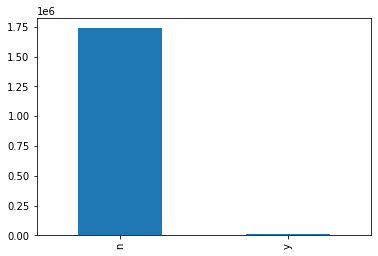

In [ ]:
df['canel_yn'].value_counts().plot(kind='bar')
plt.show()

### 해지율 피벗테이블 생성

In [ ]:
# 범주형 변수만 있는 데이터 생성: df_cat
# 주의: 종속변수도 빼먹지 말고 넣어주기
df_cat = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,17,18,19,21,22,23,25,26,28,32,33,34]]   
df_cat.head()

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_SCRB_CNT_GRP,SCRB_PATH_NM_GRP,AGMT_END_SEG,AGMT_END_YMD,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,VOC_TOTAL_MONTH1_YN,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_TMS_1_2_INCREASE_YN,CH_FAV_RANK1,KIDS_USE_YN_MONTH1,NFX_USE_YN,YTB_USE_YN,canel_yn
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,Y,N,N,N,수신,수신,감소,기타,N,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,N,N,N,N,전체거부,수신,비슷,KBS1,N,N,N,n


In [ ]:
# value count를 위한 임시 컬럼 추가
df_cat['Count'] = 1
df_cat.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_SCRB_CNT_GRP,SCRB_PATH_NM_GRP,AGMT_END_SEG,AGMT_END_YMD,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,VOC_TOTAL_MONTH1_YN,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_TMS_1_2_INCREASE_YN,CH_FAV_RANK1,KIDS_USE_YN_MONTH1,NFX_USE_YN,YTB_USE_YN,canel_yn,Count
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,Y,N,N,N,수신,수신,감소,기타,N,N,N,n,1
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,N,N,N,N,전체거부,수신,비슷,KBS1,N,N,N,n,1


In [ ]:
# 피벗 테이블 생성
ATT_SVC_USE_DAYS_GRP = df_cat.pivot_table(index=df_cat['SVC_USE_DAYS_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_MEDIA_NM_GRP = df_cat.pivot_table(index=df_cat['MEDIA_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_PROD_NM_GRP = df_cat.pivot_table(index=df_cat['PROD_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_PROD_OLD_YN = df_cat.pivot_table(index=df_cat['PROD_OLD_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_AGMT_KIND_NM = df_cat.pivot_table(index=df_cat['AGMT_KIND_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_STB_RES_1M_YN = df_cat.pivot_table(index=df_cat['STB_RES_1M_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_SVOD_SCRB_CNT_GRP = df_cat.pivot_table(index=df_cat['SVOD_SCRB_CNT_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_PAID_CHNL_SCRB_CNT_GRP = df_cat.pivot_table(index=df_cat['PAID_CHNL_SCRB_CNT_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_SCRB_PATH_NM_GRP = df_cat.pivot_table(index=df_cat['SCRB_PATH_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_AGMT_END_SEG = df_cat.pivot_table(index=df_cat['AGMT_END_SEG'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_AGMT_END_YMD = df_cat.pivot_table(index=df_cat['AGMT_END_YMD'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_BUNDLE_YN = df_cat.pivot_table(index=df_cat['BUNDLE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_DIGITAL_GIGA_YN = df_cat.pivot_table(index=df_cat['DIGITAL_GIGA_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_DIGITAL_ALOG_YN = df_cat.pivot_table(index=df_cat['DIGITAL_ALOG_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_VOC_TOTAL_MONTH1_YN = df_cat.pivot_table(index=df_cat['VOC_TOTAL_MONTH1_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_EMAIL_RECV_CLS_NM = df_cat.pivot_table(index=df_cat['EMAIL_RECV_CLS_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_SMS_SEND_CLS_NM = df_cat.pivot_table(index=df_cat['SMS_SEND_CLS_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_CH_TMS_1_2_INCREASE_YN = df_cat.pivot_table(index=df_cat['CH_TMS_1_2_INCREASE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_CH_FAV_RANK1 = df_cat.pivot_table(index=df_cat['CH_FAV_RANK1'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_KIDS_USE_YN_MONTH1 = df_cat.pivot_table(index=df_cat['KIDS_USE_YN_MONTH1'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_NFX_USE_YN = df_cat.pivot_table(index=df_cat['NFX_USE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
ATT_YTB_USE_YN = df_cat.pivot_table(index=df_cat['YTB_USE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')

In [ ]:
# 해지율 컬럼 추가 & 높은 순서대로 정렬
att_list = [
ATT_SVC_USE_DAYS_GRP,
ATT_MEDIA_NM_GRP,
ATT_PROD_NM_GRP,
ATT_PROD_OLD_YN,
ATT_AGMT_KIND_NM,
ATT_STB_RES_1M_YN,
ATT_SVOD_SCRB_CNT_GRP,
ATT_PAID_CHNL_SCRB_CNT_GRP,
ATT_SCRB_PATH_NM_GRP,
ATT_AGMT_END_SEG,
ATT_AGMT_END_YMD,
ATT_BUNDLE_YN,
ATT_DIGITAL_GIGA_YN,
ATT_DIGITAL_ALOG_YN,
ATT_VOC_TOTAL_MONTH1_YN,
ATT_EMAIL_RECV_CLS_NM,
ATT_SMS_SEND_CLS_NM,
ATT_CH_TMS_1_2_INCREASE_YN,
ATT_CH_FAV_RANK1,
ATT_KIDS_USE_YN_MONTH1,
ATT_NFX_USE_YN,
ATT_YTB_USE_YN
]

for i in att_list:
    i['churning_rate(%)'] = round((i[('Count', 'y')] / (i[('Count', 'n')] + i[('Count', 'y')])) * 100, 2)
    i.sort_values(by=['churning_rate(%)'], ascending=False, inplace=True)
    print(i, '\n')

                    Count       churning_rate(%)
canel_yn                n     y                 
SVC_USE_DAYS_GRP                                
6개월미만               74936   559             0.74
24개월~36개월미만        264992  1845             0.69
6개월~12개월미만          76934   538             0.69
36개월 이상           1125615  7617             0.67
12개월~24개월미만        195679  1192             0.61 

                Count        churning_rate(%)
canel_yn            n      y                 
MEDIA_NM_GRP                                 
UHD             10273     90             0.87
HD            1727883  11661             0.67 

                Count         churning_rate(%)
canel_yn            n       y                 
PROD_NM_GRP                                   
세이버             394.0     3.0             0.76
프리미엄         405201.0  3089.0             0.76
이코노미         532248.0  3501.0             0.65
베이직          777826.0  5022.0             0.64
스탠다드          22470.0   136.0             0.6

In [ ]:
df_num = df.columns.difference([
'SVC_USE_DAYS_GRP',
'MEDIA_NM_GRP',
'PROD_NM_GRP',
'PROD_OLD_YN',
'AGMT_KIND_NM',
'STB_RES_1M_YN',
'SVOD_SCRB_CNT_GRP',
'PAID_CHNL_SCRB_CNT_GRP',
'SCRB_PATH_NM_GRP',
'AGMT_END_SEG',
'AGMT_END_YMD',
'BUNDLE_YN',
'DIGITAL_GIGA_YN',
'DIGITAL_ALOG_YN',
'VOC_TOTAL_MONTH1_YN',
'EMAIL_RECV_CLS_NM',
'SMS_SEND_CLS_NM',
'CH_TMS_1_2_INCREASE_YN',
'CH_FAV_RANK1',
'KIDS_USE_YN_MONTH1',
'NFX_USE_YN',
'YTB_USE_YN'
])

In [ ]:
df_num.dtype

dtype('O')

In [ ]:
# 범주형 변수와 연속형 변수 구분한 리스트 생성
num = df.select_dtypes('number').columns.to_list()
cat = df.select_dtypes('object').columns.to_list()

In [ ]:
num

['TOTAL_USED_DAYS',
 'TV_SCRB',
 'ANALOG_SCRB',
 'DIGITAL_SCRB',
 'TOTAL_INTERNET_SCRB',
 'GIGA_INTERNET_SCRB',
 'TV_I_CNT',
 'CH_HH_AVG_MONTH1',
 'KIDS_USE_PV_MONTH1',
 'KIDS_VOD_CNT_MONTH1',
 'TOT_AMT_MONTH1',
 'TOT_AMT_3MM']

In [ ]:
cat

['SVC_USE_DAYS_GRP',
 'MEDIA_NM_GRP',
 'PROD_NM_GRP',
 'PROD_OLD_YN',
 'AGMT_KIND_NM',
 'STB_RES_1M_YN',
 'SVOD_SCRB_CNT_GRP',
 'PAID_CHNL_SCRB_CNT_GRP',
 'SCRB_PATH_NM_GRP',
 'AGMT_END_SEG',
 'AGMT_END_YMD',
 'BUNDLE_YN',
 'DIGITAL_GIGA_YN',
 'DIGITAL_ALOG_YN',
 'VOC_TOTAL_MONTH1_YN',
 'EMAIL_RECV_CLS_NM',
 'SMS_SEND_CLS_NM',
 'CH_TMS_1_2_INCREASE_YN',
 'CH_FAV_RANK1',
 'KIDS_USE_YN_MONTH1',
 'NFX_USE_YN',
 'YTB_USE_YN',
 'canel_yn']

In [ ]:
len(num) + len(cat)

35

### 변수별 단변량 분석 시각화

In [ ]:
# 시각화 위한 컬럼 percentage 계산 함수
def percent_maker(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

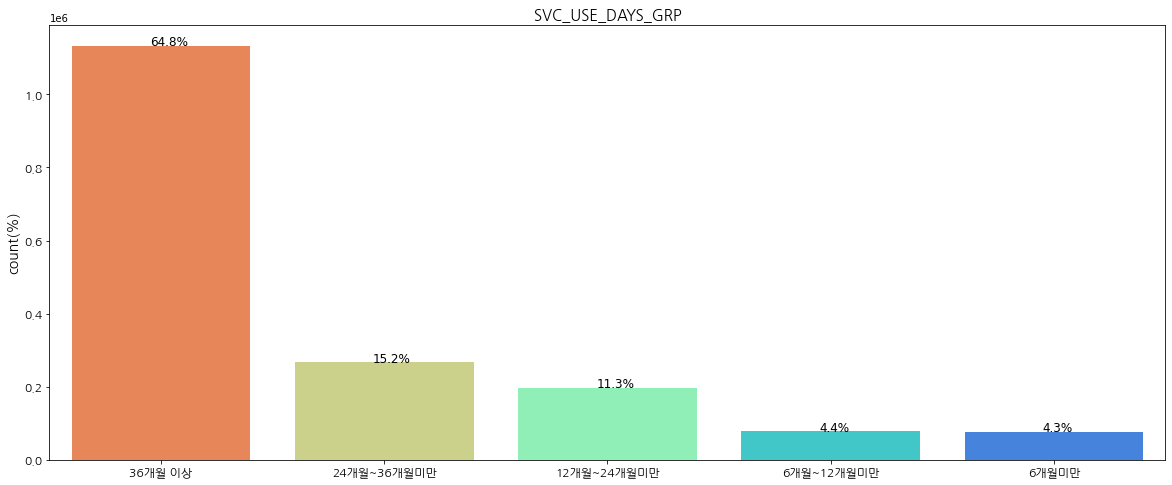

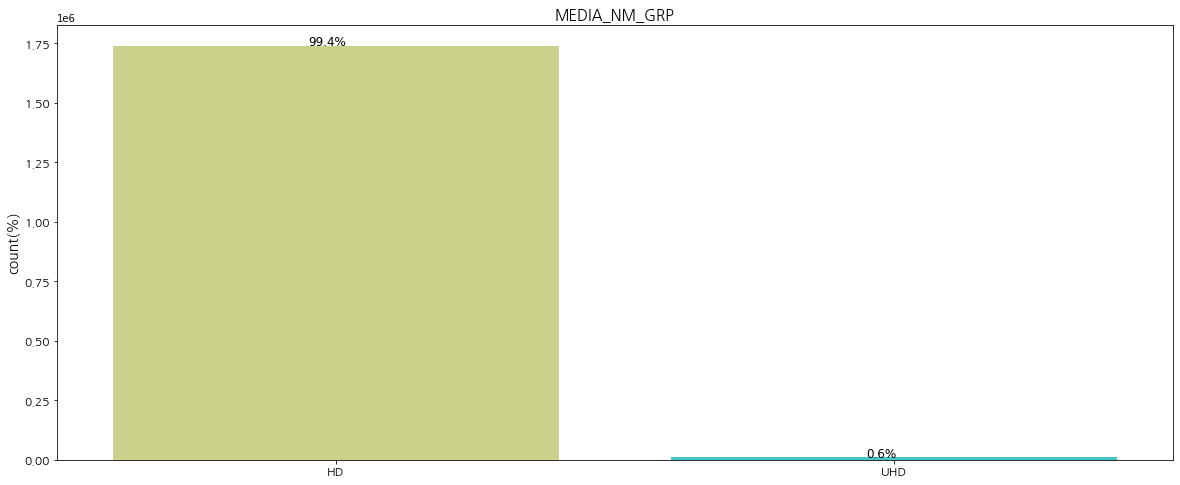

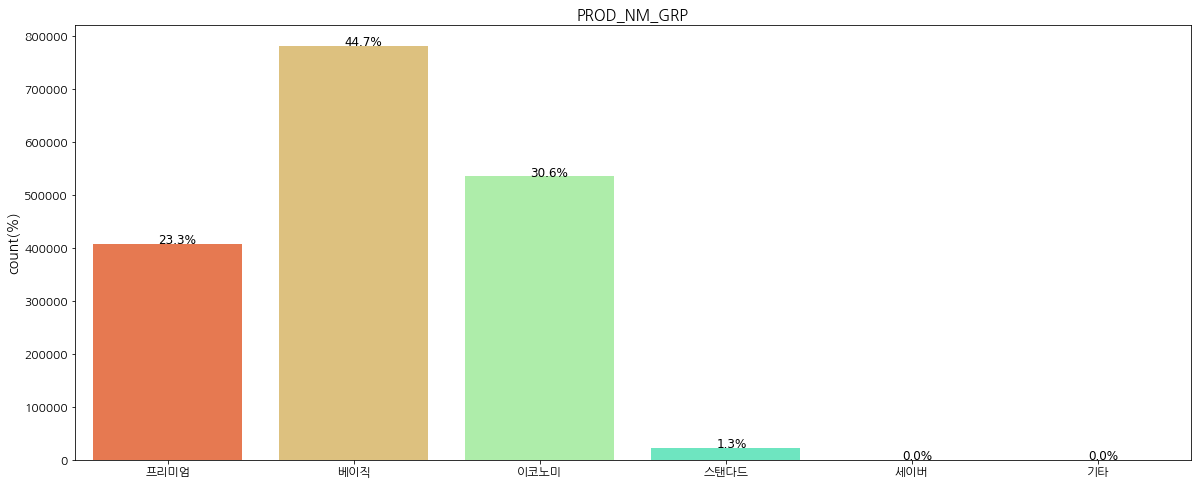

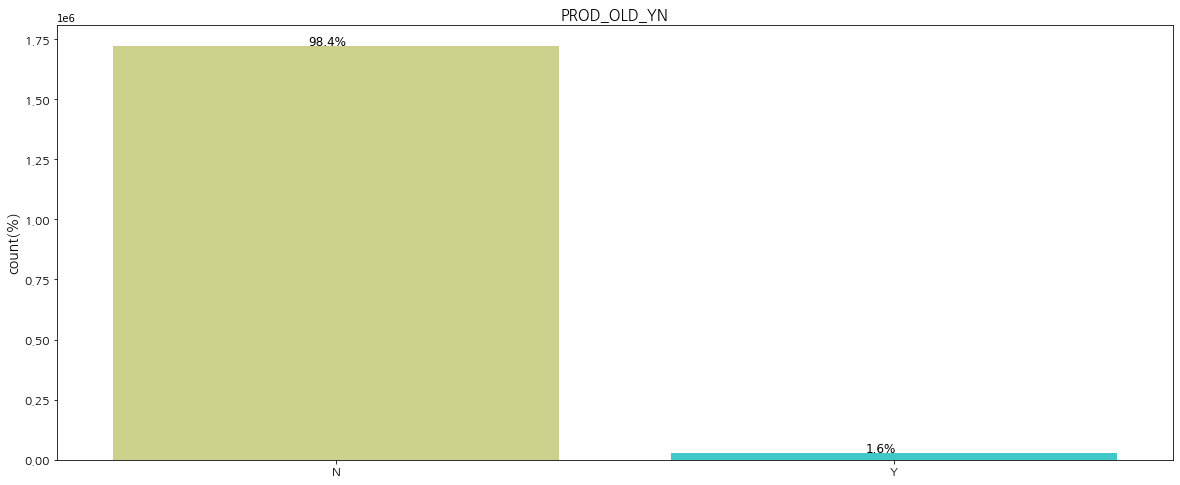

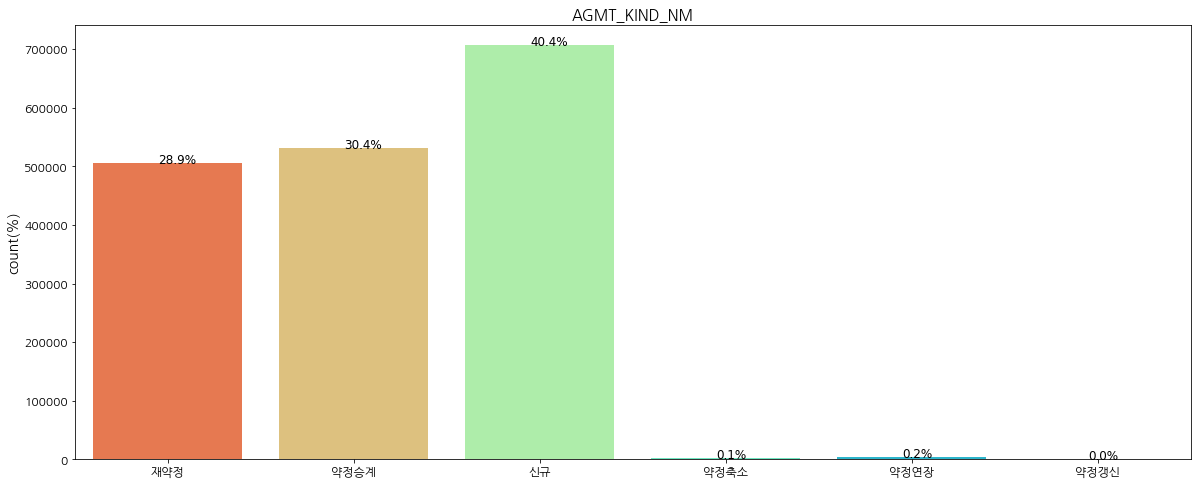

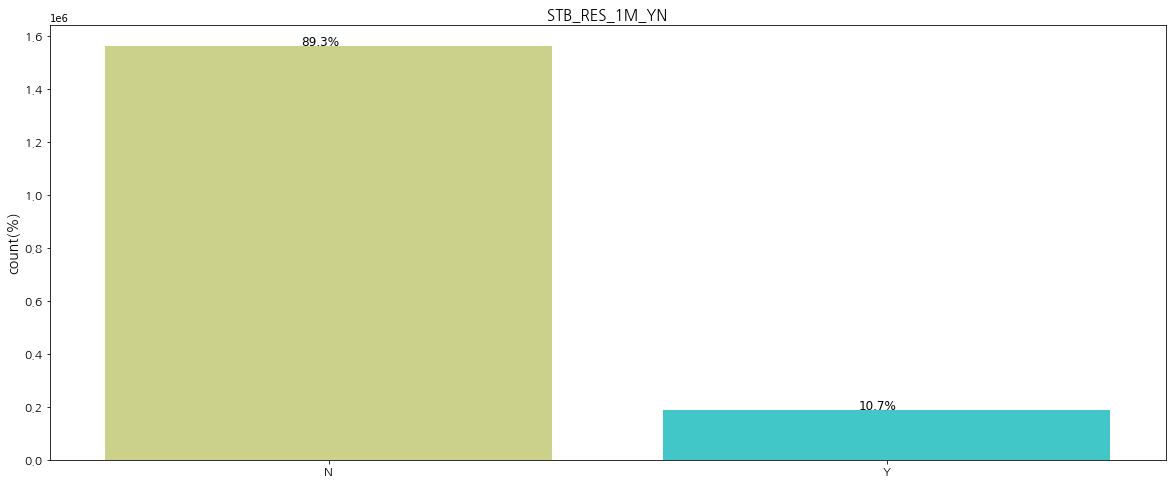

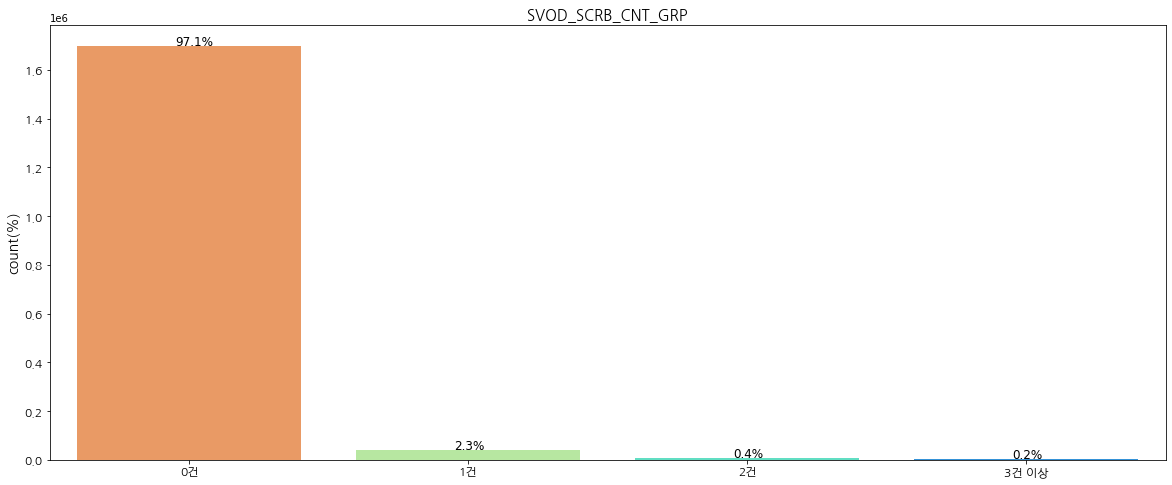

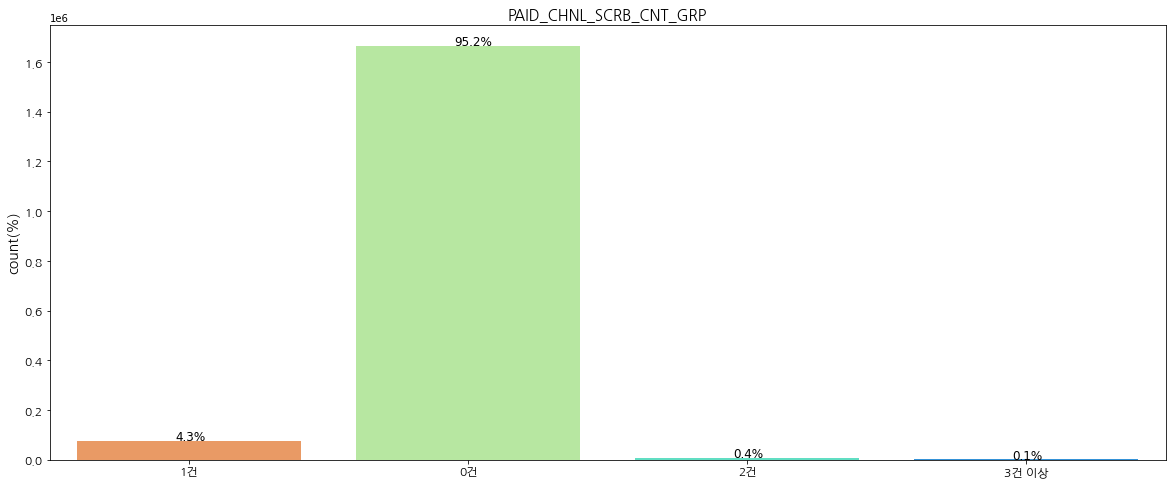

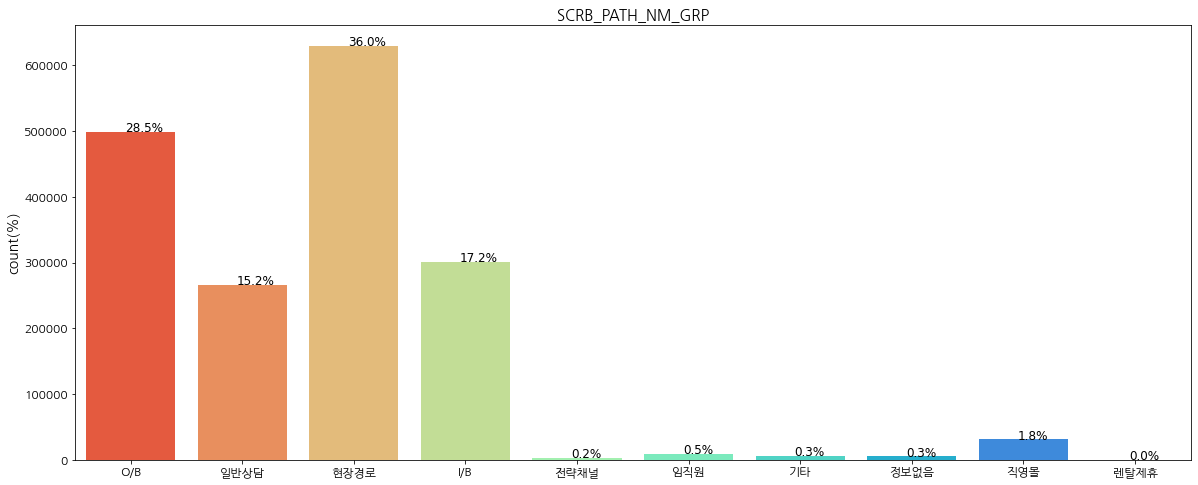

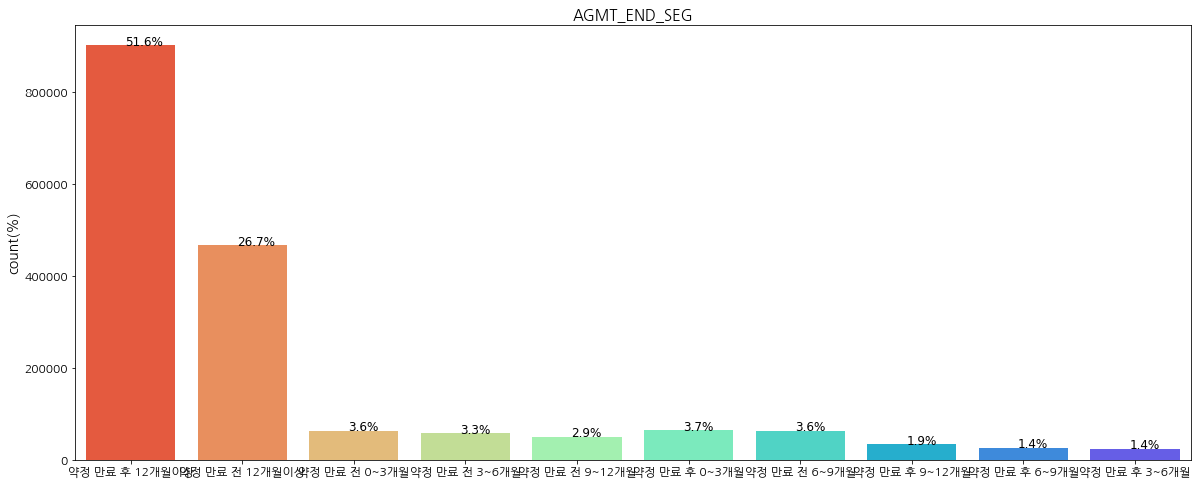

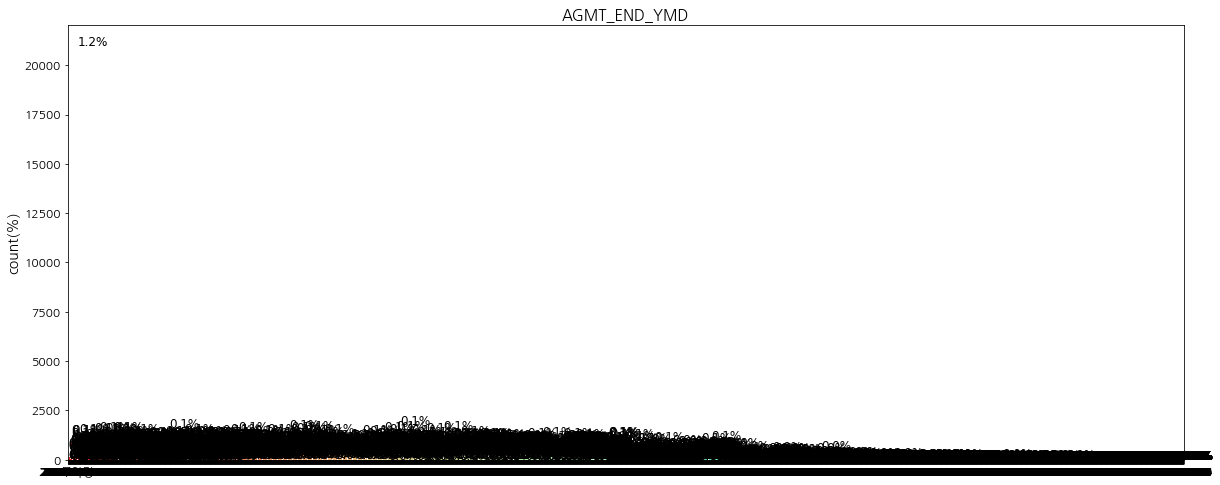

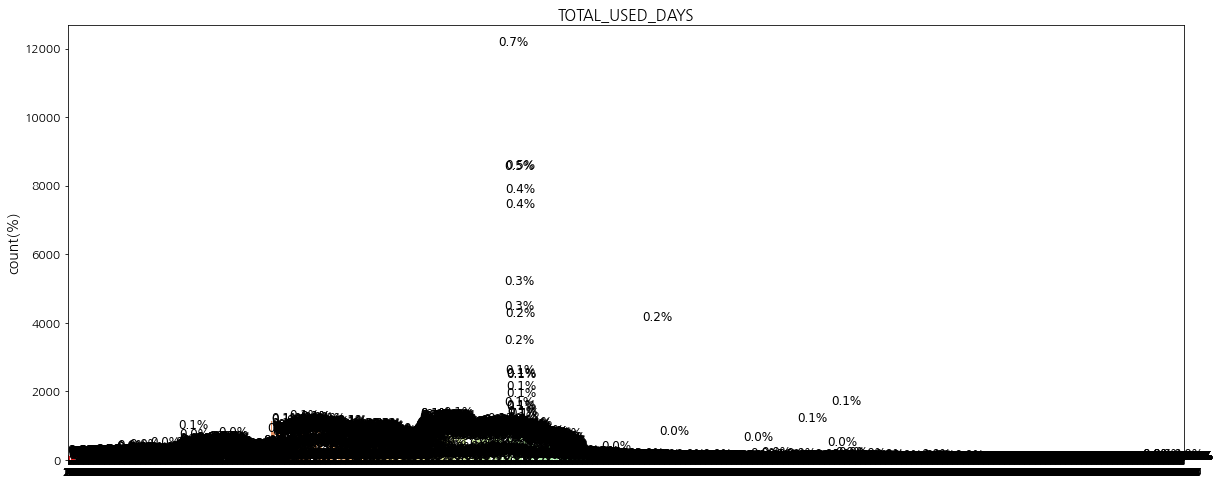

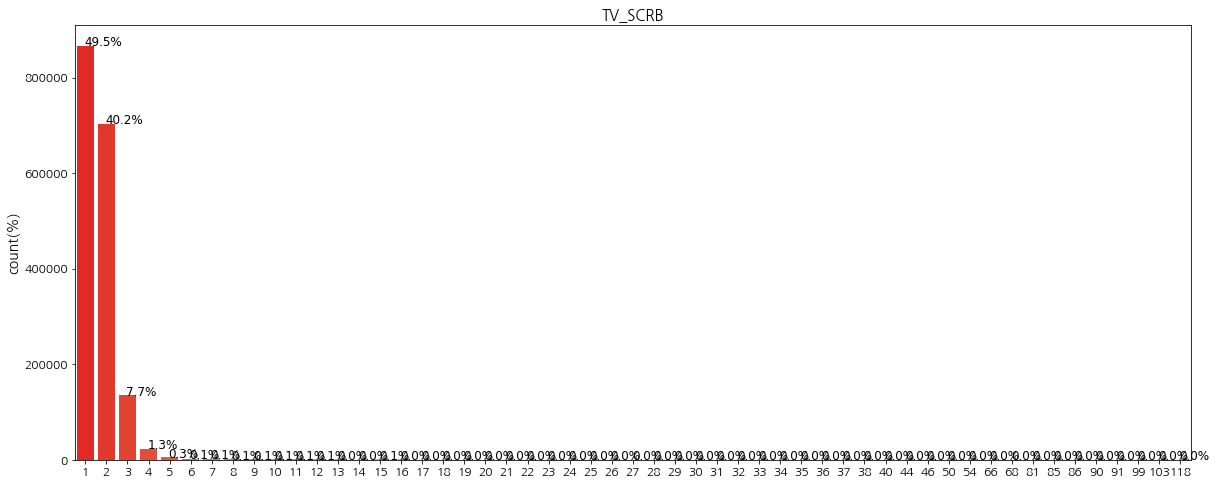

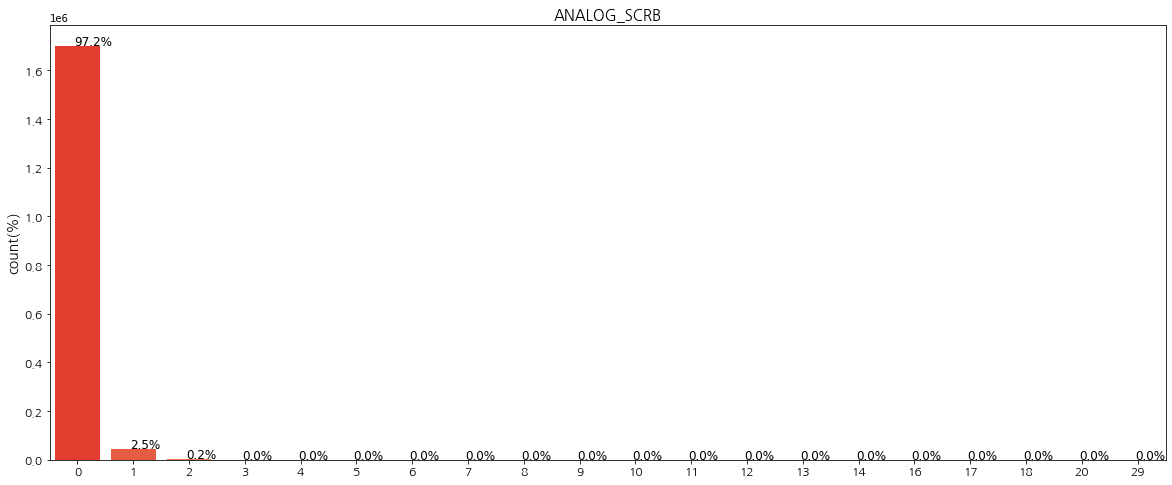

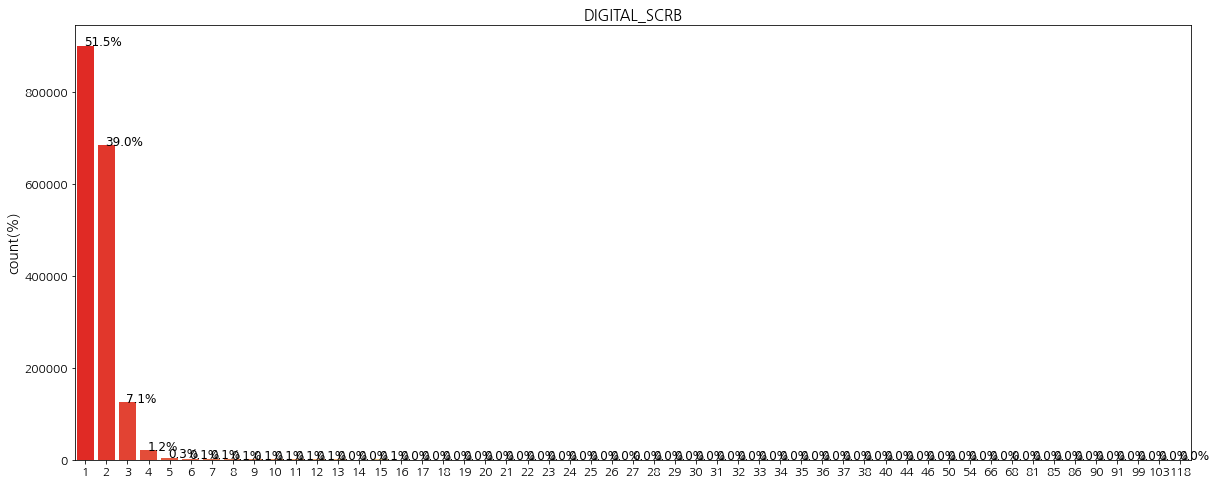

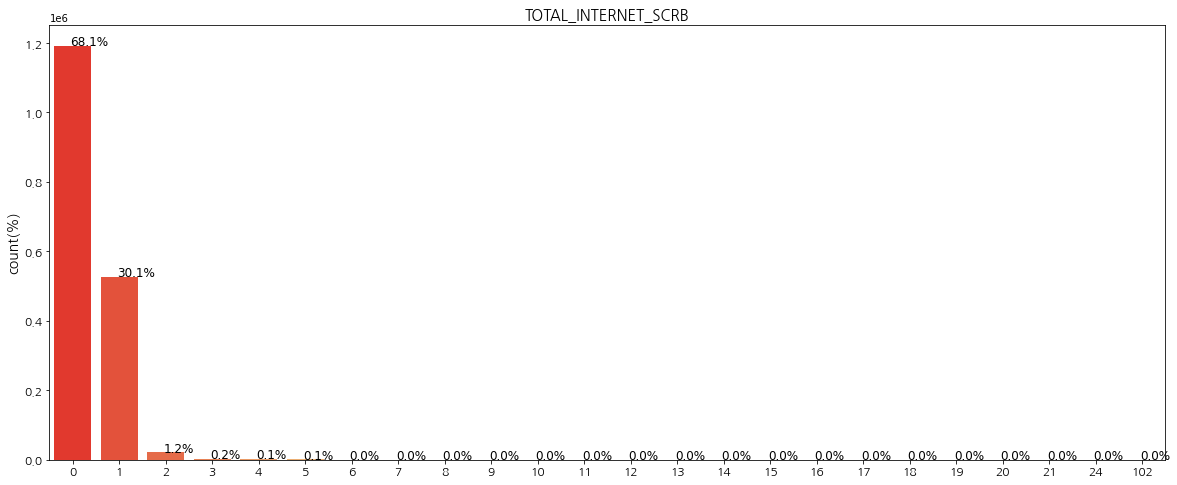

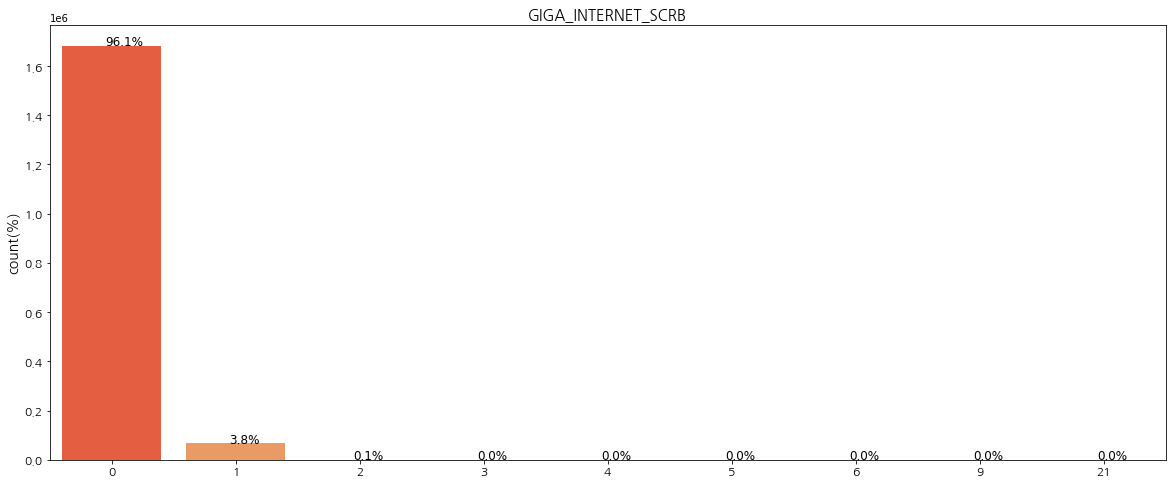

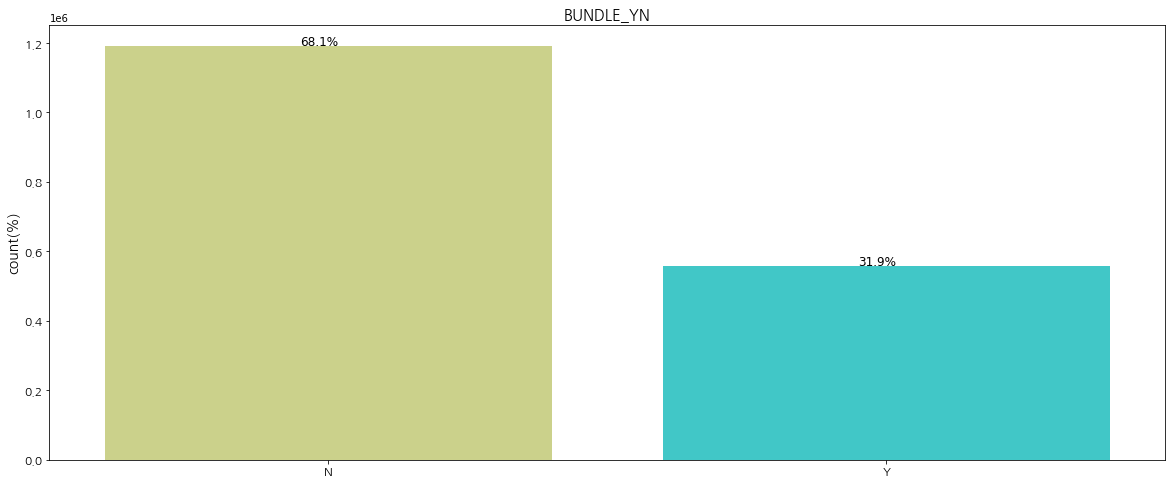

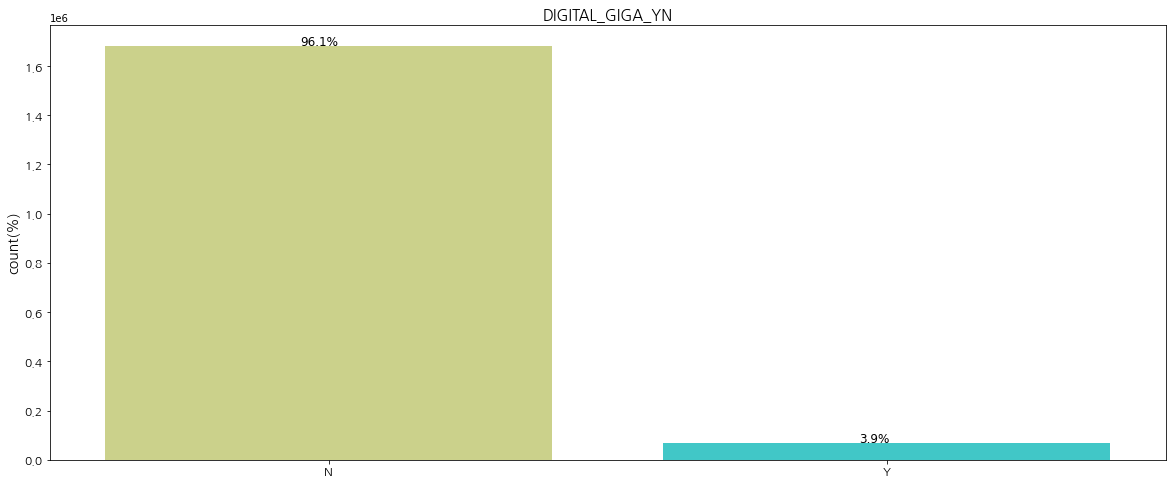

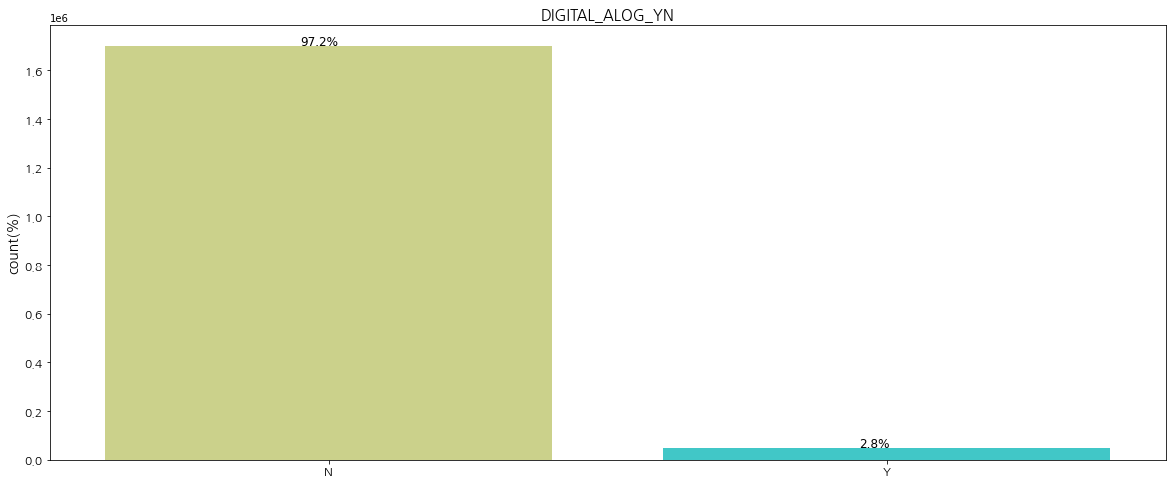

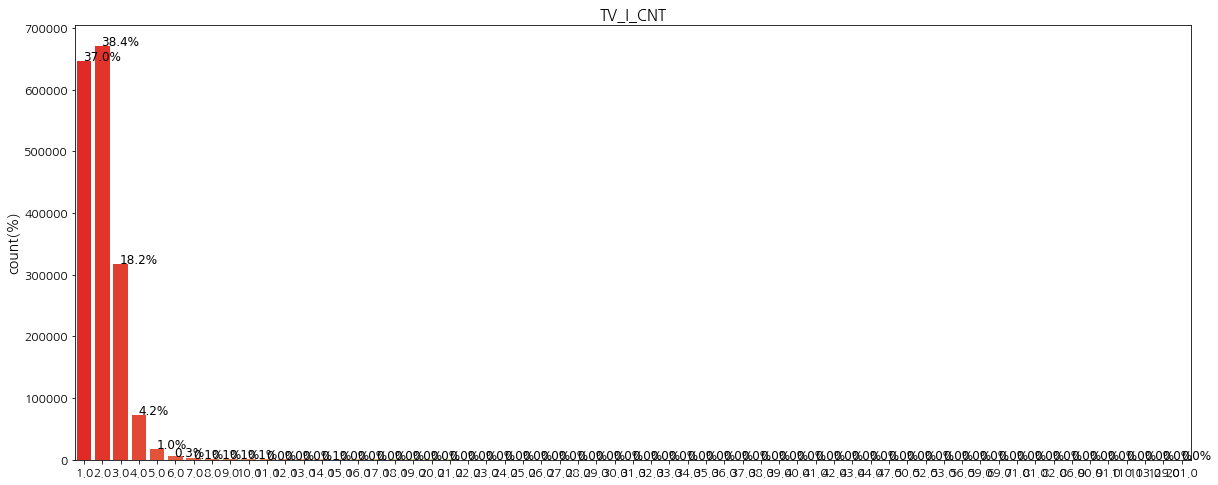

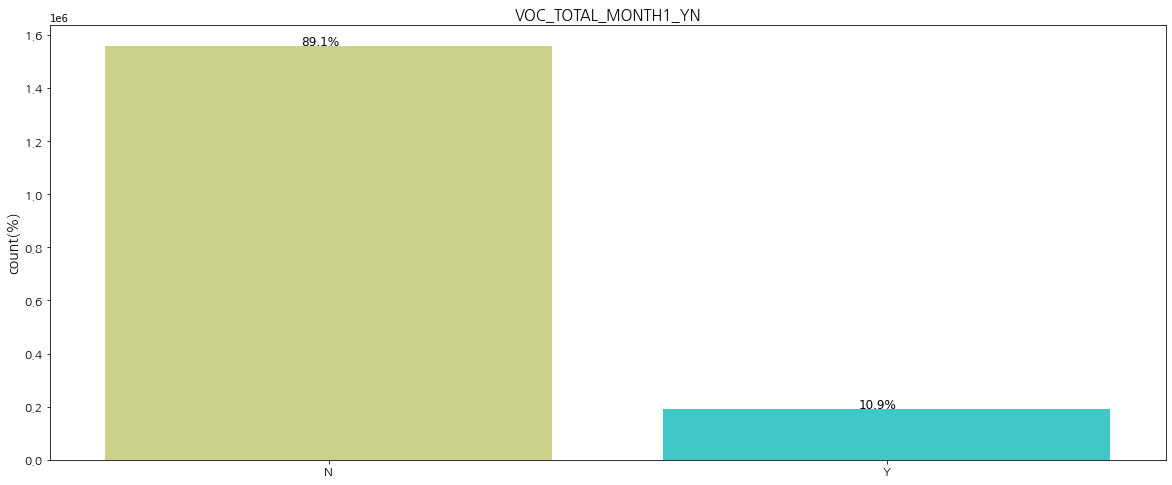

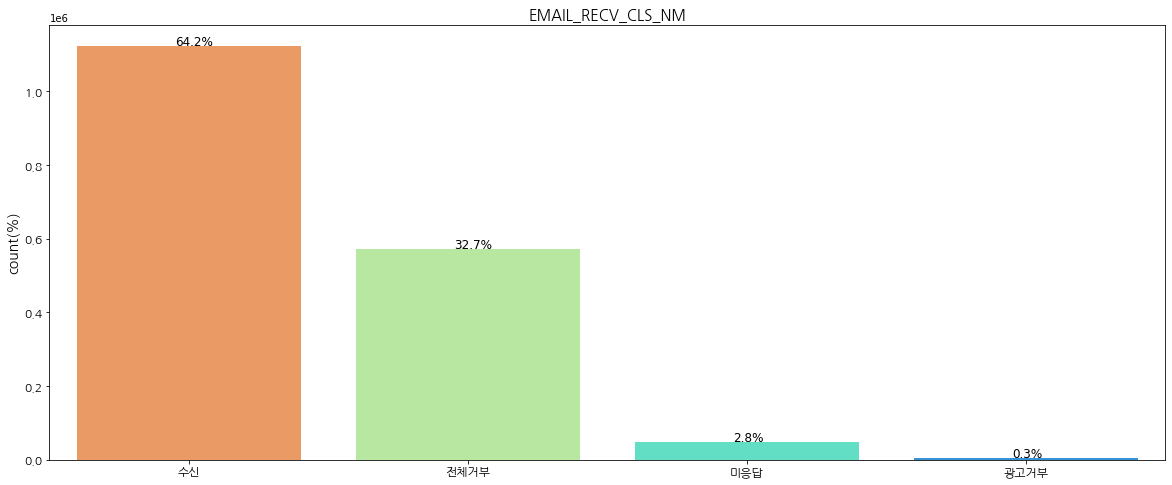

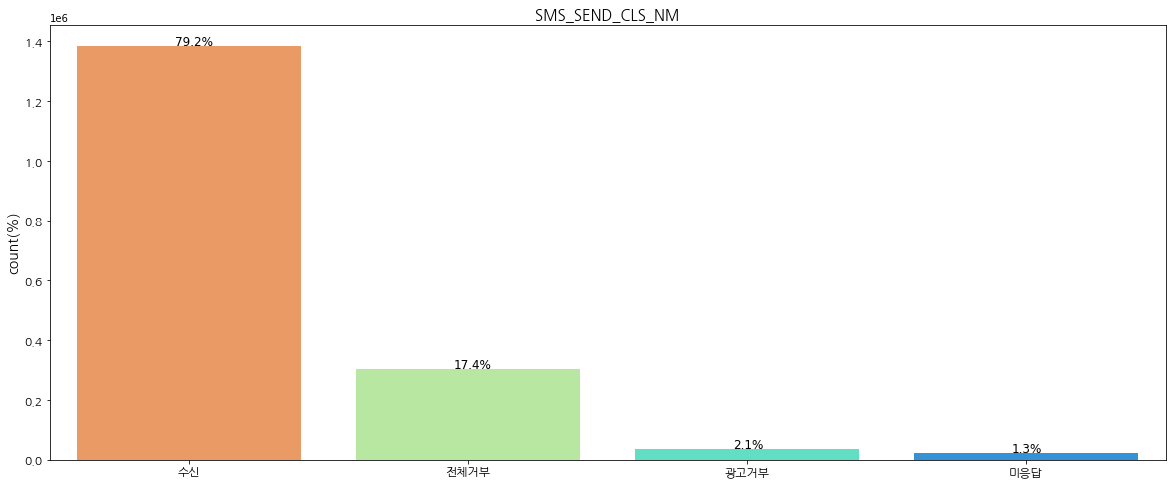

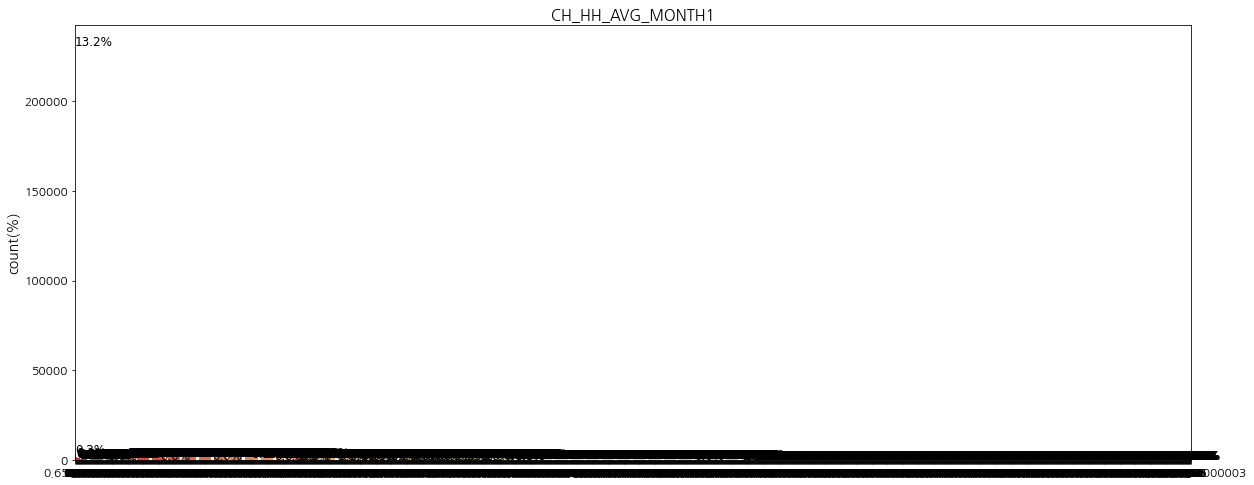

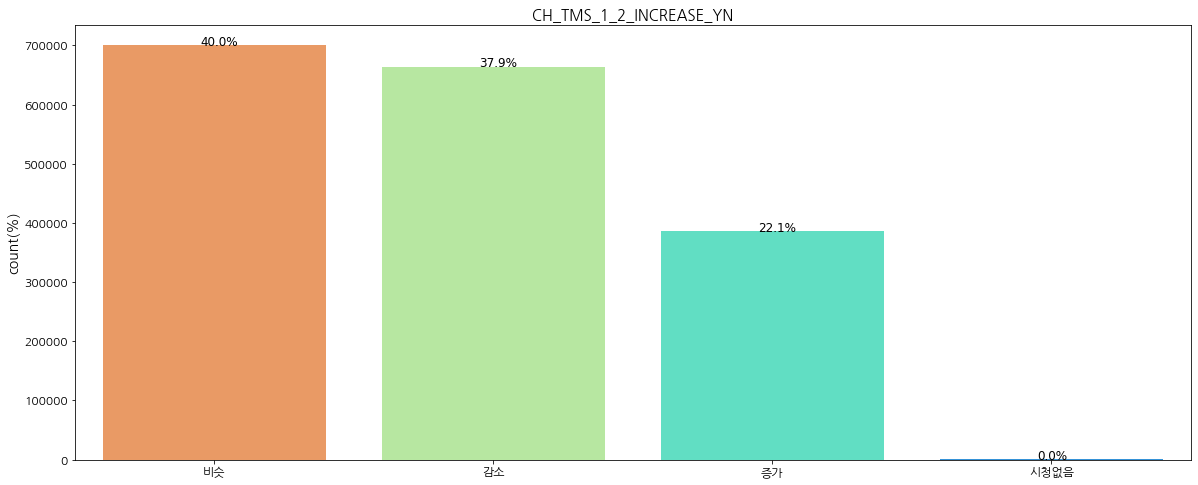

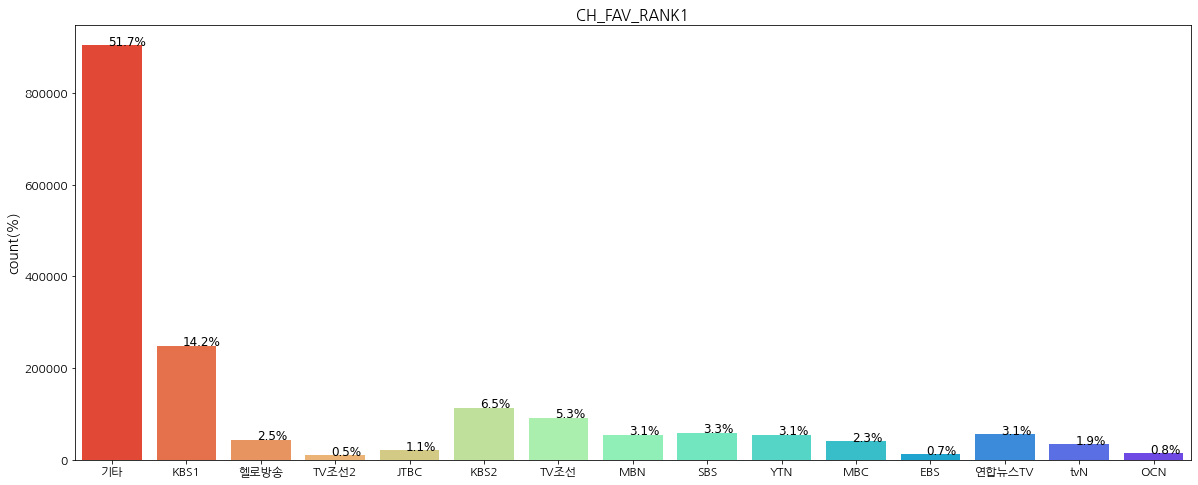

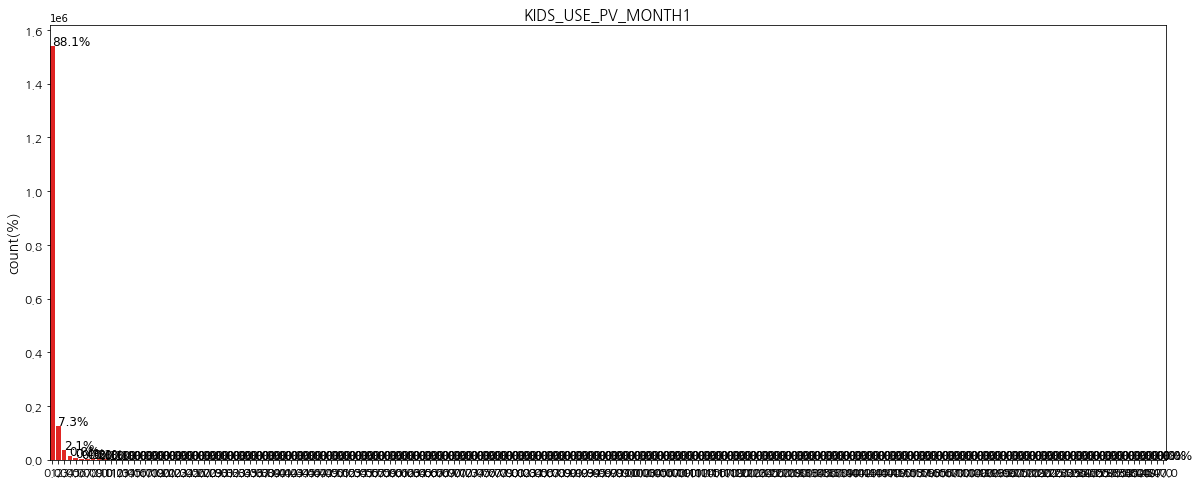

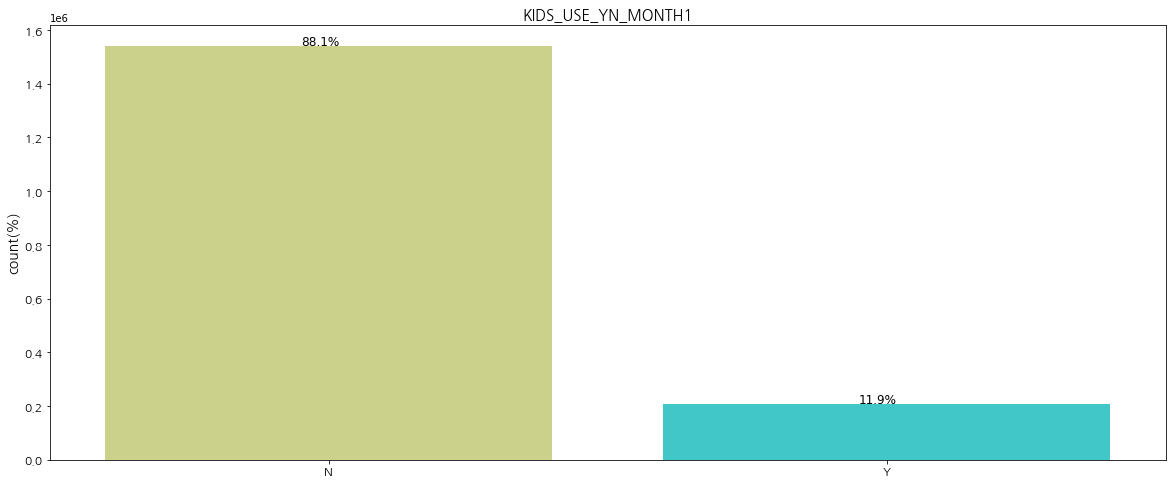

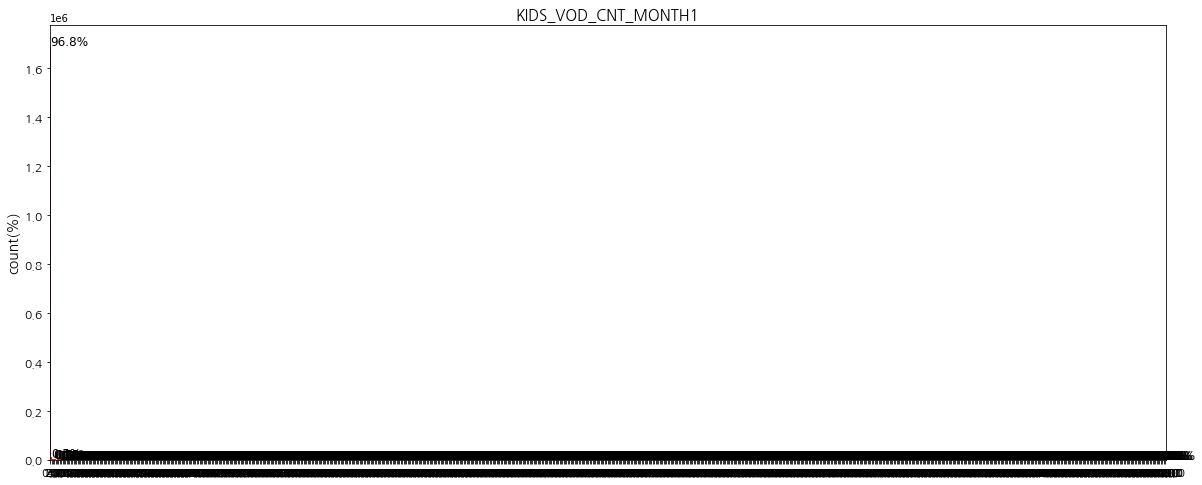

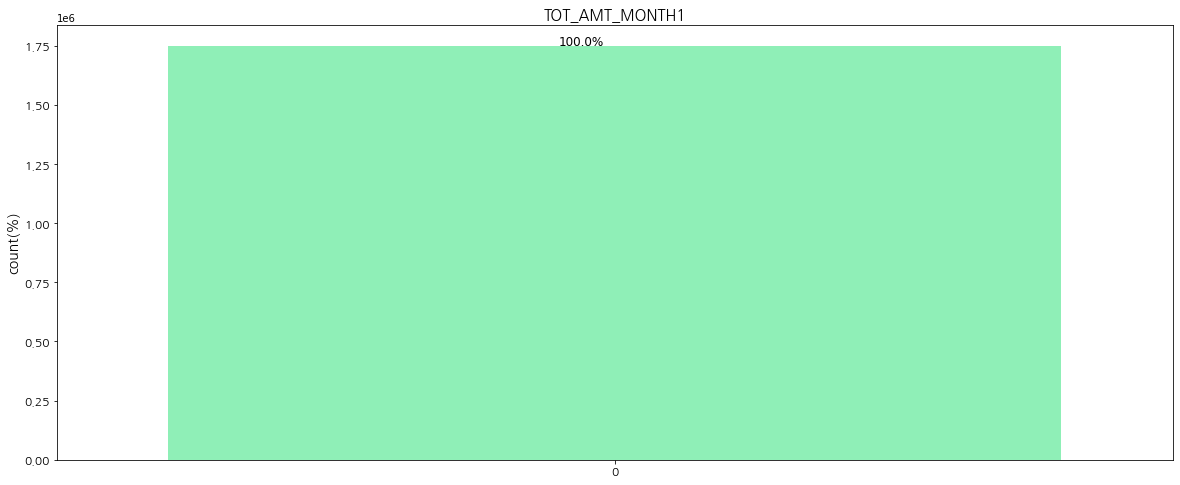

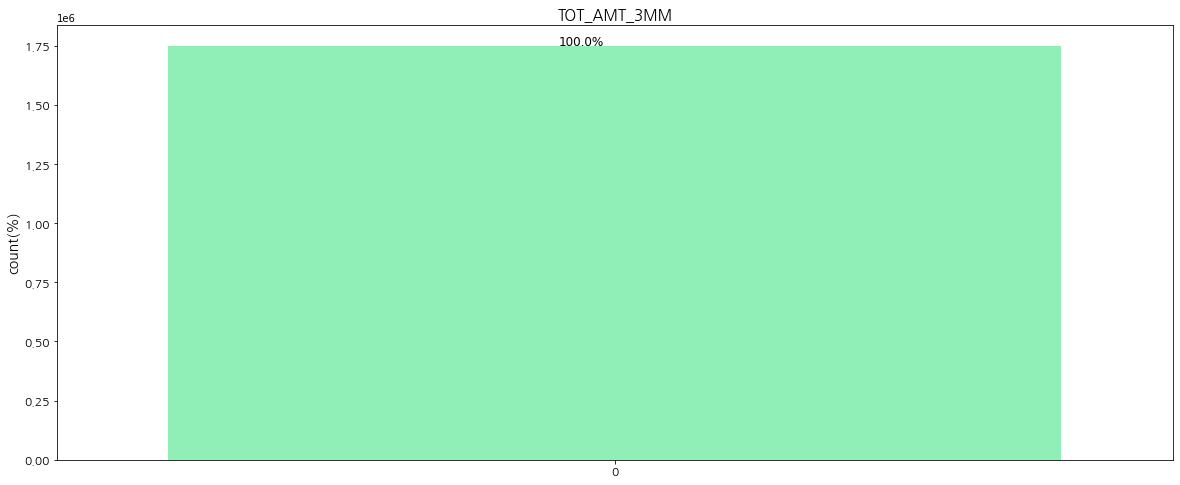

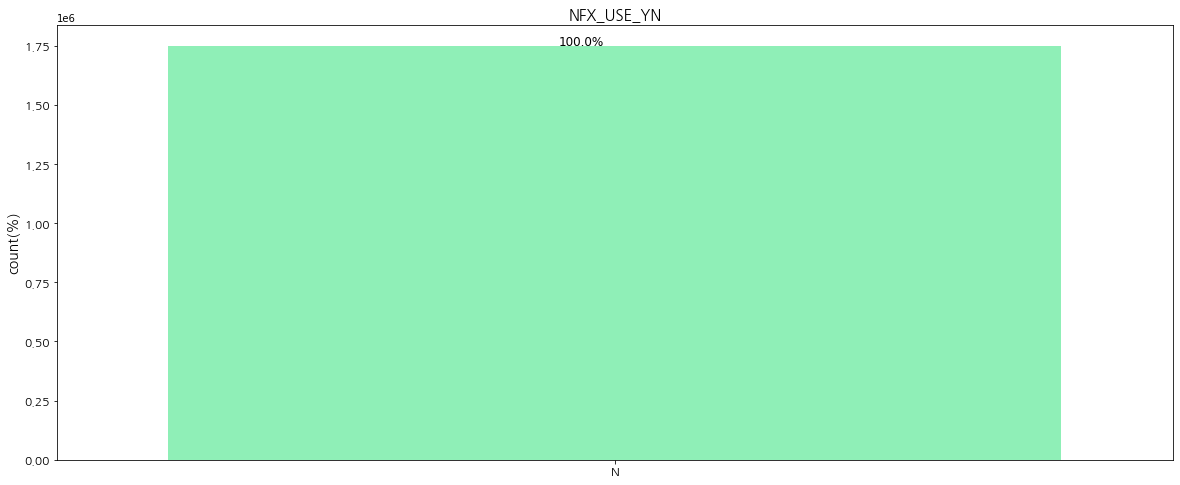

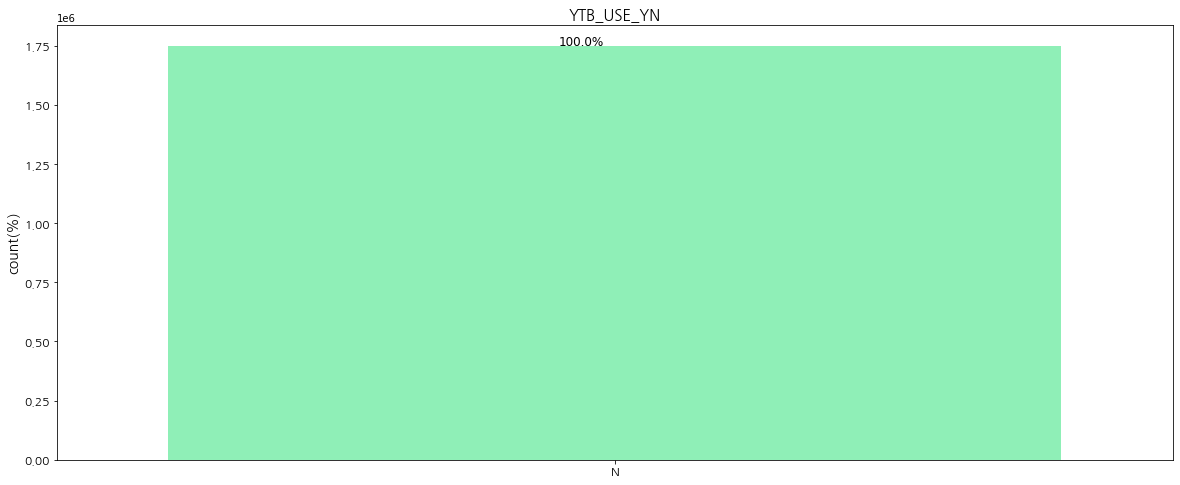

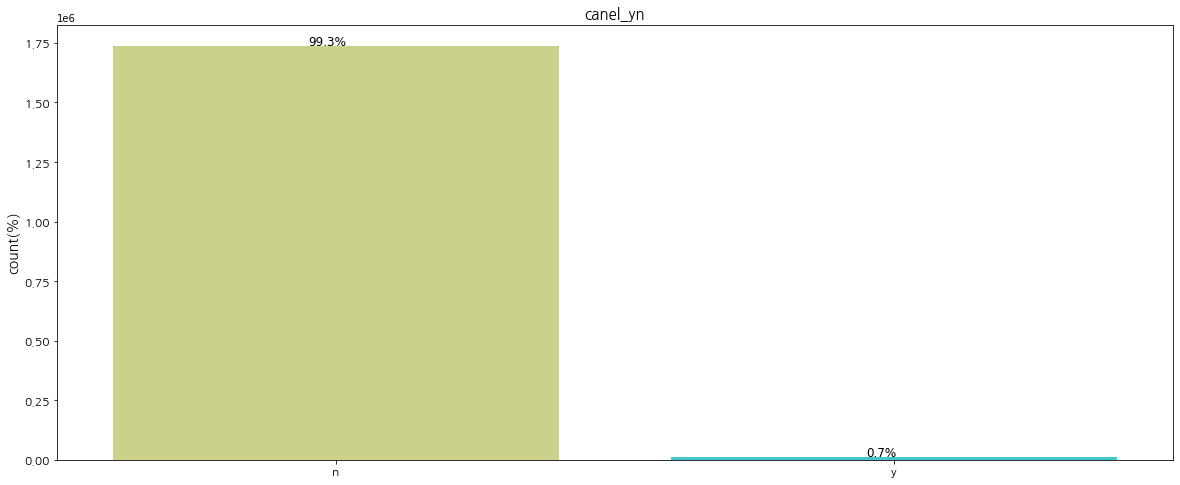

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 설명변수 중 범주형 변수 분포 확인
for i in df:
    plt.figure(figsize=(20,8))
    ax = sns.countplot(x=i , data=df ,palette='rainbow_r')
    plt.xticks(size = 12,fontproperties=fontprop)
    plt.xlabel('', fontsize=14,fontproperties=fontprop)
    plt.ylabel('count(%)', fontsize=14,fontproperties=fontprop)
    plt.yticks(size = 12,fontproperties=fontprop)
    plt.title(i, size = 15, fontproperties=fontprop)
    percent_maker(ax, df[i])

### 연속형 변수 boxplot 확인

In [ ]:
num

['TOTAL_USED_DAYS',
 'TV_SCRB',
 'ANALOG_SCRB',
 'DIGITAL_SCRB',
 'TOTAL_INTERNET_SCRB',
 'GIGA_INTERNET_SCRB',
 'TV_I_CNT',
 'CH_HH_AVG_MONTH1',
 'KIDS_USE_PV_MONTH1',
 'KIDS_VOD_CNT_MONTH1',
 'TOT_AMT_MONTH1',
 'TOT_AMT_3MM']

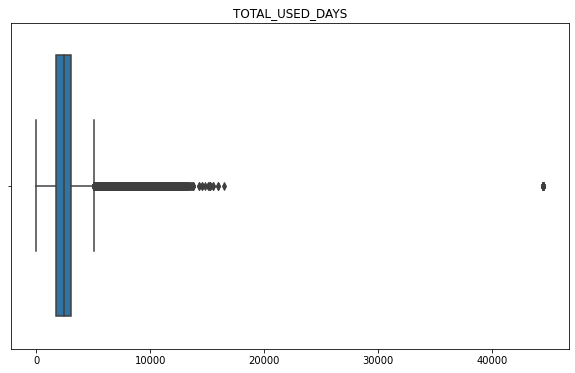

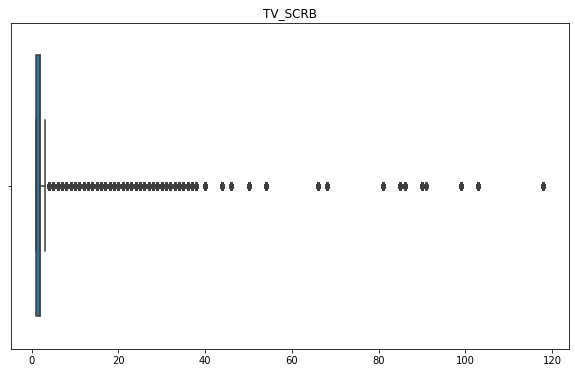

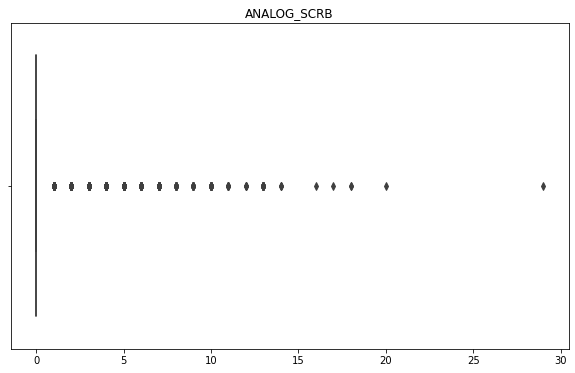

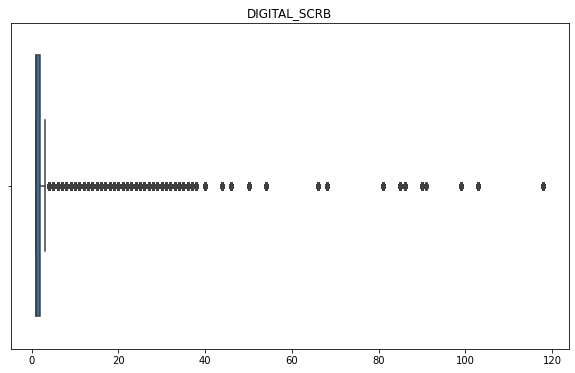

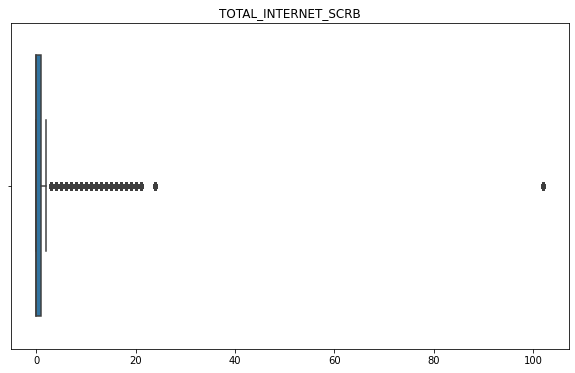

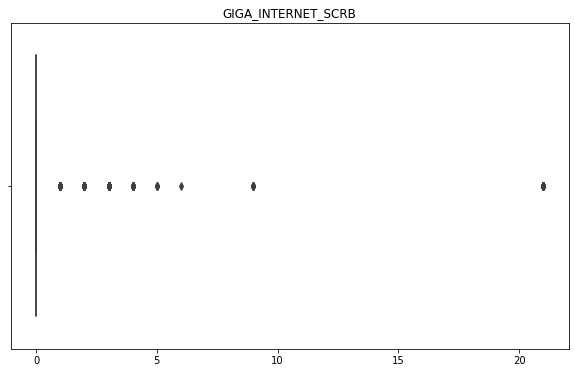

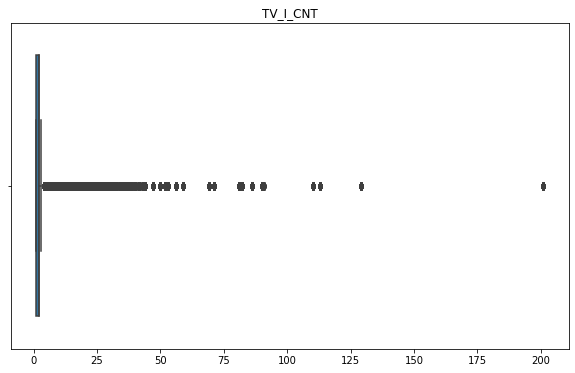

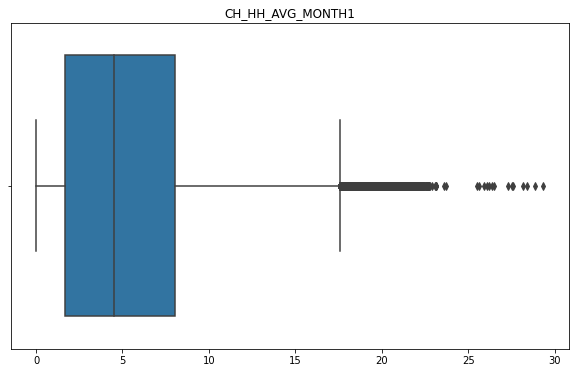

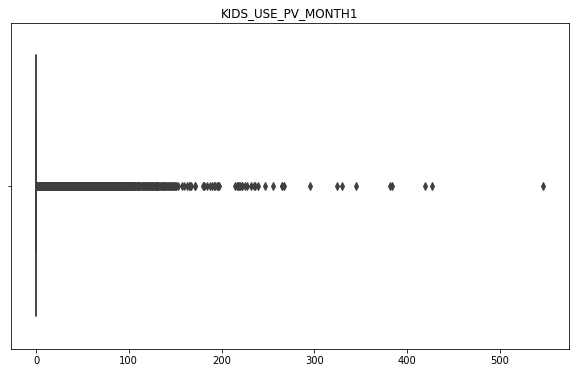

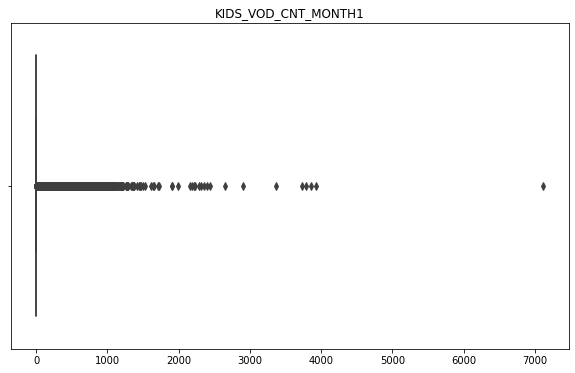

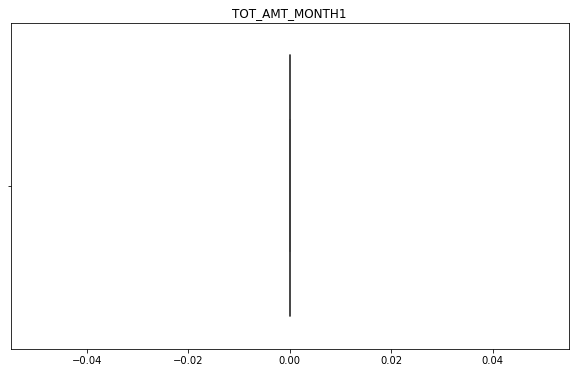

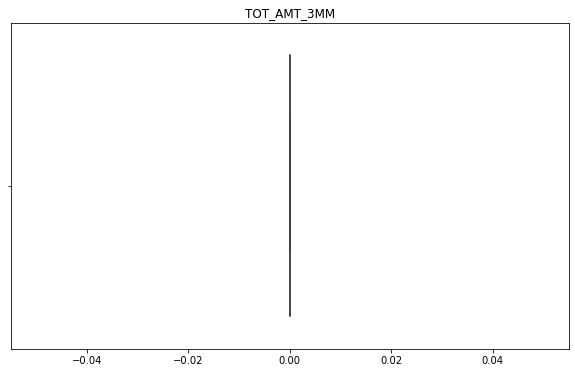

In [ ]:
for i in num:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=df[i])
    plt.title(i)
    plt.xlabel('')
    plt.show

### corr 확인

In [ ]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,TV_I_CNT,CH_HH_AVG_MONTH1,KIDS_USE_PV_MONTH1,KIDS_VOD_CNT_MONTH1,TOT_AMT_MONTH1,TOT_AMT_3MM
TOTAL_USED_DAYS,1.00,0.01,0.06,0.00,0.00,-0.10,0.01,0.05,-0.02,-0.01,NaN,NaN
TV_SCRB,0.01,1.00,0.09,1.00,0.49,0.05,0.96,-0.08,-0.01,-0.00,NaN,NaN
ANALOG_SCRB,0.06,0.09,1.00,0.00,0.01,-0.00,0.07,-0.01,0.00,0.00,NaN,NaN
DIGITAL_SCRB,0.00,1.00,0.00,1.00,0.49,0.05,0.96,-0.08,-0.01,-0.00,NaN,NaN
TOTAL_INTERNET_SCRB,0.00,0.49,0.01,0.49,1.00,0.19,0.71,-0.05,0.01,0.01,NaN,NaN
GIGA_INTERNET_SCRB,-0.10,0.05,-0.00,0.05,0.19,1.00,0.10,-0.04,0.01,0.01,NaN,NaN
TV_I_CNT,0.01,0.96,0.07,0.96,0.71,0.10,1.00,-0.08,-0.00,-0.00,NaN,NaN
CH_HH_AVG_MONTH1,0.05,-0.08,-0.01,-0.08,-0.05,-0.04,-0.08,1.00,0.04,0.01,NaN,NaN
KIDS_USE_PV_MONTH1,-0.02,-0.01,0.00,-0.01,0.01,0.01,-0.00,0.04,1.00,0.72,NaN,NaN
KIDS_VOD_CNT_MONTH1,-0.01,-0.00,0.00,-0.00,0.01,0.01,-0.00,0.01,0.72,1.00,NaN,NaN


### 상관관계의 개념
#### · 두 변수 사이의 관계를 분석하는 방법
#### · 상관관계로 인과관계를 파악할 수 없다
#### · 1에서 +1까지의 범위
#### · 값이 0.6 이상이면 강한 상관관계로 봄
#### · 값이 0.2 이하이면 약한 상관관계로 봄

### 변수별 상관관계 높은 컬럼 확인

In [ ]:
corr_unstack = corr_df.unstack()
corr_unstack

TOTAL_USED_DAYS      TOTAL_USED_DAYS        1.00
                     TV_SCRB                0.01
                     ANALOG_SCRB            0.06
                     DIGITAL_SCRB           0.00
                     TOTAL_INTERNET_SCRB    0.00
                     GIGA_INTERNET_SCRB    -0.10
                     TV_I_CNT               0.01
                     CH_HH_AVG_MONTH1       0.05
                     KIDS_USE_PV_MONTH1    -0.02
                     KIDS_VOD_CNT_MONTH1   -0.01
                     TOT_AMT_MONTH1          NaN
                     TOT_AMT_3MM             NaN
TV_SCRB              TOTAL_USED_DAYS        0.01
                     TV_SCRB                1.00
                     ANALOG_SCRB            0.09
                     DIGITAL_SCRB           1.00
                     TOTAL_INTERNET_SCRB    0.49
                     GIGA_INTERNET_SCRB     0.05
                     TV_I_CNT               0.96
                     CH_HH_AVG_MONTH1      -0.08
                    

In [ ]:
# seaborn 한글 폰트 설정
# path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

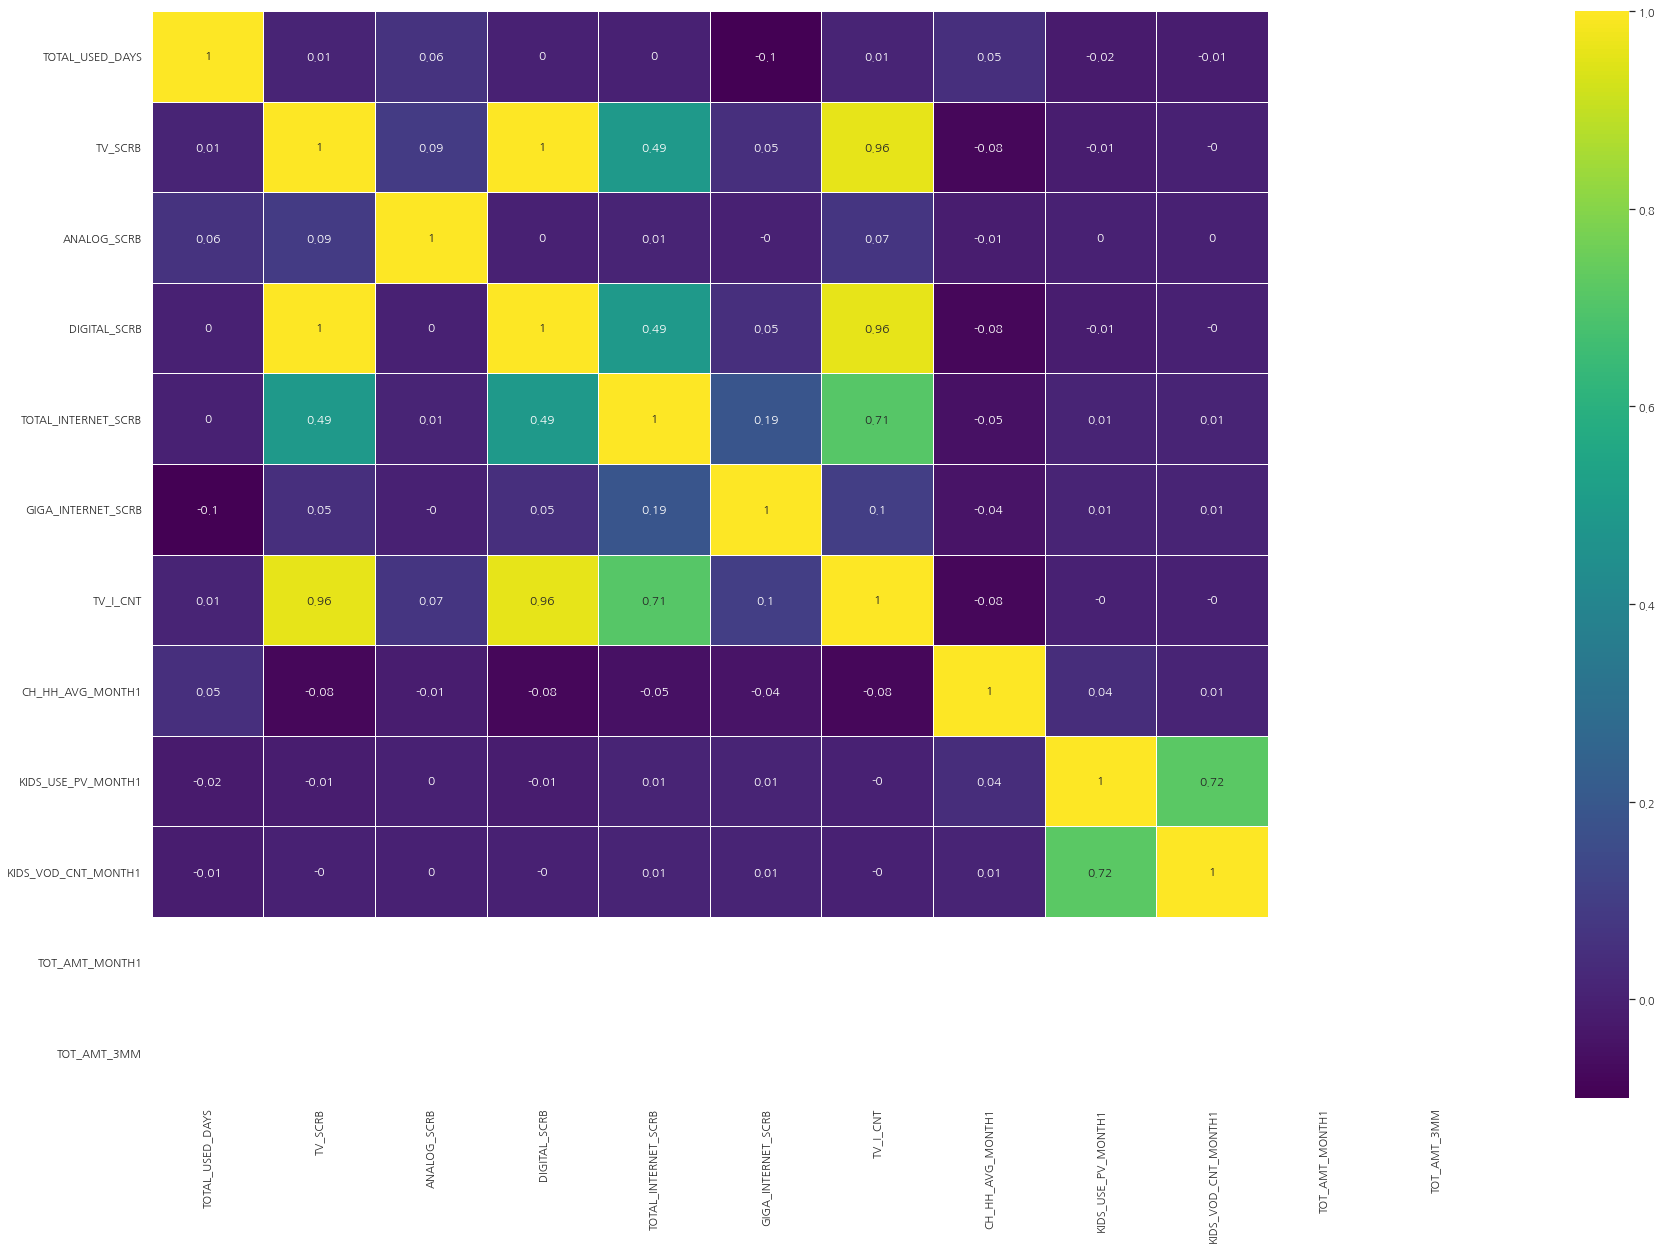

In [ ]:
# 변수끼리의 상관성 확인

plt.figure(figsize=(30, 20))
sns.heatmap(corr_df, annot=True, linewidths=1, cmap='viridis');

## 새로운 컬럼 생성(확인용)

### SVC_USE_DAYS_GRP와 TOTAL_USED_DAYS 비교하는 컬럼 만들기

In [ ]:
# TOTAL_USED_DAYS를 통해 USED_TERM_BY_TOTAL_USED_DAYS 컬럼을 생성
df.loc[df['TOTAL_USED_DAYS'] < 180, 'USED_TERM_BY_TOTAL_USED_DAYS'] = '~6M'
df.loc[(df['TOTAL_USED_DAYS'] >= 180) & (df['TOTAL_USED_DAYS'] < 360), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '6M~12M'
df.loc[(df['TOTAL_USED_DAYS'] >= 360) & (df['TOTAL_USED_DAYS'] < 720), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '12M~24M'
df.loc[(df['TOTAL_USED_DAYS'] >= 720) & (df['TOTAL_USED_DAYS'] < 1080), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '24M~36M'
df.loc[df['TOTAL_USED_DAYS'] >= 1080, 'USED_TERM_BY_TOTAL_USED_DAYS'] = '36M~'

In [ ]:
# SVC_USE_DAYS_GRP을 통해 USED_TERM_BY_SVC_USE_DAYS_GRP 컬럼을 생성
df.loc[df['SVC_USE_DAYS_GRP'] == '6개월미만', 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '~6M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '6개월~12개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '6M~12M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '12개월~24개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '12M~24M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '24개월~36개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '24M~36M'
df.loc[df['SVC_USE_DAYS_GRP'] >= '36개월 이상', 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '36M~'

In [ ]:
df.head()

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_SCRB_CNT_GRP,SCRB_PATH_NM_GRP,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,VOC_TOTAL_MONTH1_YN,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_TMS_1_2_INCREASE_YN,CH_FAV_RANK1,KIDS_USE_PV_MONTH1,KIDS_USE_YN_MONTH1,KIDS_VOD_CNT_MONTH1,TOT_AMT_MONTH1,TOT_AMT_3MM,NFX_USE_YN,YTB_USE_YN,canel_yn,USED_TERM_BY_TOTAL_USED_DAYS,USED_TERM_BY_SVC_USE_DAYS_GRP
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,2,0,2,0,0,N,N,N,2.0,N,수신,수신,13.77,비슷,기타,0.0,N,0.0,0,0,N,N,n,36M~,36M~
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,5,0,5,0,0,N,N,N,5.0,N,수신,수신,5.80,비슷,기타,0.0,N,0.0,0,0,N,N,n,36M~,36M~
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,1,0,1,0,0,N,N,N,1.0,N,수신,수신,0.00,비슷,기타,0.0,N,0.0,0,0,N,N,n,36M~,36M~
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,3,0,3,1,0,Y,N,N,4.0,N,수신,수신,6.43,감소,기타,0.0,N,0.0,0,0,N,N,n,36M~,36M~
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,1,0,1,0,0,N,N,N,1.0,N,전체거부,수신,5.21,비슷,KBS1,0.0,N,0.0,0,0,N,N,n,36M~,36M~


In [ ]:
df1 = df.loc[:,['USED_TERM_BY_TOTAL_USED_DAYS']]
df2 = df.loc[:,['USED_TERM_BY_SVC_USE_DAYS_GRP']]

In [ ]:
df1.head()

,USED_TERM_BY_TOTAL_USED_DAYS
0,36M~
1,36M~
2,36M~
3,36M~
4,36M~


In [ ]:
df2.head()

,USED_TERM_BY_SVC_USE_DAYS_GRP
0,36M~
1,36M~
2,36M~
3,36M~
4,36M~


In [ ]:
df_concat = pd.concat([df1,df2], axis=1)

In [ ]:
df_concat.head()

,USED_TERM_BY_TOTAL_USED_DAYS,USED_TERM_BY_SVC_USE_DAYS_GRP
0,36M~,36M~
1,36M~,36M~
2,36M~,36M~
3,36M~,36M~
4,36M~,36M~


In [ ]:
df_concat.loc[df_concat['USED_TERM_BY_TOTAL_USED_DAYS'] == df_concat['USED_TERM_BY_SVC_USE_DAYS_GRP'], 'TF'] = 'True'
df_concat.head()

,USED_TERM_BY_TOTAL_USED_DAYS,USED_TERM_BY_SVC_USE_DAYS_GRP,TF
0,36M~,36M~,True
1,36M~,36M~,True
2,36M~,36M~,True
3,36M~,36M~,True
4,36M~,36M~,True


In [ ]:
df_compare = df_concat[df_concat['TF'].isnull()]
df_compare.to_excel('/home/ljy1115/project/df_compare.xlsx', sheet_name='new_name')

### seaborn 한글설정하기

In [ ]:
# path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

### 한글설정 테스트

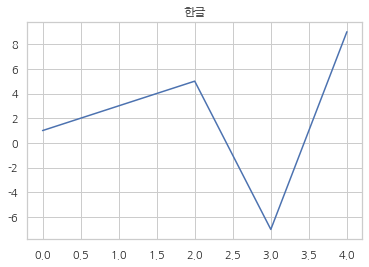

In [ ]:
pd.Series([1,3,5,-7,9]).plot(title= '한글');

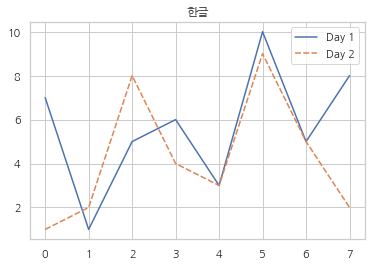

In [ ]:

df_test = pd.DataFrame({"Day 1": [7,1,5,6,3,10,5,8],
                 "Day 2" : [1,2,8,4,3,9,5,2]})

p = sns.lineplot(data = df_test)
p.set(title = "한글");

In [ ]:
df['TOTAL_INTERNET_SCRB'].value_counts()

0      1192036
1       527379
2        21813
3         3282
4         1733
5          913
6          642
10         302
7          294
9          236
8          233
11         196
17          99
24          96
19          92
16          90
12          76
102         74
13          72
18          67
21          57
15          54
20          40
14          31
Name: TOTAL_INTERNET_SCRB, dtype: int64

In [ ]:
df['KIDS_USE_PV_MONTH1'].value_counts()

0.0      1541996
1.0       127095
2.0        36315
3.0        14646
4.0         7652
5.0         4640
6.0         3261
7.0         2225
8.0         1662
9.0         1348
10.0        1045
11.0         837
12.0         712
13.0         601
14.0         510
15.0         411
16.0         352
17.0         344
18.0         300
19.0         256
20.0         231
21.0         214
22.0         197
23.0         172
24.0         152
25.0         148
26.0         124
28.0         119
31.0         119
30.0         111
27.0         109
29.0          95
32.0          90
33.0          88
34.0          87
35.0          78
37.0          69
36.0          68
38.0          63
40.0          57
39.0          53
42.0          50
45.0          50
43.0          48
46.0          42
41.0          40
44.0          40
52.0          38
47.0          38
48.0          34
55.0          33
56.0          30
60.0          30
58.0          28
50.0          28
57.0          28
68.0          26
53.0          26
54.0          

In [ ]:
df_giga = df[['GIGA_INTERNET_SCRB','DIGITAL_GIGA_YN']]
df_giga

,GIGA_INTERNET_SCRB,DIGITAL_GIGA_YN
0,0,N
1,0,N
2,0,N
3,0,N
4,0,N
...,...,...
1749902,0,N
1749903,0,N
1749904,0,N
1749905,0,N


In [ ]:
df_giga_1 = df_giga.loc[df_giga['DIGITAL_GIGA_YN'] == 'Y']
df_giga_2 = df_giga.loc[df_giga['DIGITAL_GIGA_YN'] == 'N']

In [ ]:
df_giga_1.value_counts()

GIGA_INTERNET_SCRB  DIGITAL_GIGA_YN
1                   Y                  66638
2                   Y                    912
3                   Y                     44
21                  Y                     22
4                   Y                     16
9                   Y                      9
5                   Y                      5
6                   Y                      1
dtype: int64

In [ ]:
df_giga_2.value_counts()

GIGA_INTERNET_SCRB  DIGITAL_GIGA_YN
0                   N                  1682260
dtype: int64

# 끝

In [ ]:
df_num['TOT_AMT_MONTH1'].value_counts()

0    1749907
Name: TOT_AMT_MONTH1, dtype: int64

In [ ]:
df_num['TOT_AMT_3MM'].value_counts()

0    1749907
Name: TOT_AMT_3MM, dtype: int64

In [ ]:
#총이용일수 삭제
df.drop('TOT_AMT_MONTH1', axis = 1, inplace = True)

In [ ]:
#총이용일수 삭제
df.drop('TOT_AMT_3MM', axis = 1, inplace = True)

In [ ]:
df_obj = df.select_dtypes(include = object)
df_num = df.select_dtypes(exclude = object)

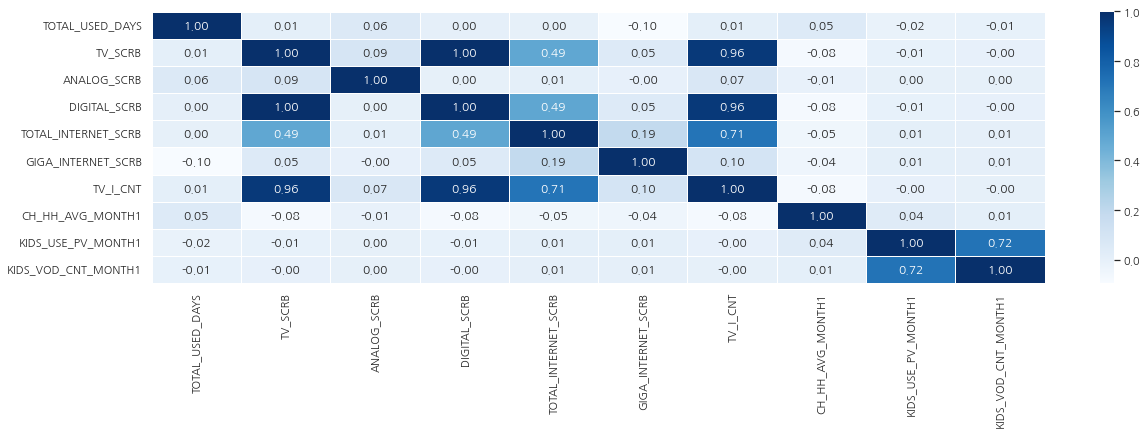

In [ ]:
plt.figure(figsize = (20, 5))
sns.heatmap(data = df_num.corr(), annot=True, fmt = '.2f', linewidths=.5, 
            cmap = sns.color_palette("Blues", as_cmap=True));

In [ ]:
df['KIDS_USE_PV_MONTH1']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1749902    0.0
1749903    0.0
1749904    0.0
1749905    0.0
1749906    0.0
Name: KIDS_USE_PV_MONTH1, Length: 1749907, dtype: float64

In [ ]:
df['KIDS_USE_YN_MONTH1']

0          N
1          N
2          N
3          N
4          N
          ..
1749902    N
1749903    N
1749904    N
1749905    N
1749906    N
Name: KIDS_USE_YN_MONTH1, Length: 1749907, dtype: object

In [ ]:
df_kids = df[['KIDS_USE_PV_MONTH1','KIDS_USE_YN_MONTH1']]

In [ ]:
df_kids.loc[df_kids['KIDS_USE_YN_MONTH1'] == 'N']

,KIDS_USE_PV_MONTH1,KIDS_USE_YN_MONTH1
0,0.0,N
1,0.0,N
2,0.0,N
3,0.0,N
4,0.0,N
...,...,...
1749902,0.0,N
1749903,0.0,N
1749904,0.0,N
1749905,0.0,N


In [ ]:
df_kids.value_counts()

KIDS_USE_PV_MONTH1  KIDS_USE_YN_MONTH1
0.0                 N                     1541850
1.0                 Y                      127095
2.0                 Y                       36315
3.0                 Y                       14646
4.0                 Y                        7652
5.0                 Y                        4640
6.0                 Y                        3261
7.0                 Y                        2225
8.0                 Y                        1662
9.0                 Y                        1348
10.0                Y                        1045
11.0                Y                         837
12.0                Y                         712
13.0                Y                         601
14.0                Y                         510
15.0                Y                         411
16.0                Y                         352
17.0                Y                         344
18.0                Y                         300
19.0       

In [ ]:
df_analog = df[['ANALOG_SCRB','DIGITAL_ALOG_YN']]

In [ ]:
df_analog.value_counts()

ANALOG_SCRB  DIGITAL_ALOG_YN
0            N                  1701716
1            Y                    44021
2            Y                     3334
3            Y                      484
4            Y                      120
5            Y                       84
7            Y                       32
6            Y                       27
10           Y                       21
13           Y                       19
8            Y                       16
9            Y                       13
11           Y                        7
12           Y                        4
14           Y                        3
18           Y                        2
16           Y                        1
17           Y                        1
20           Y                        1
29           Y                        1
dtype: int64

In [ ]:
df['AGMT_END_YMD']

0          20181013
1          20170804
2          20171030
3          20230204
4          20130720
             ...   
1749902    20170903
1749903    20171003
1749904    20171018
1749905    20240318
1749906    20201015
Name: AGMT_END_YMD, Length: 1749907, dtype: object

In [ ]:
df_endday = df[['AGMT_END_YMD','SVC_USE_DAYS_GRP']]

In [ ]:
df_endday.head()


,AGMT_END_YMD,SVC_USE_DAYS_GRP
0,20181013,36개월 이상
1,20170804,36개월 이상
2,20171030,36개월 이상
3,20230204,36개월 이상
4,20130720,36개월 이상


In [ ]:
df_endday[(df_endday['AGMT_END_YMD'] == '무약정')] = 0

/tmp/ipykernel_476641/1471606160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endday[(df_endday['AGMT_END_YMD'] == '무약정')] = 0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
df_endday.value_counts()

AGMT_END_YMD
0               20999
20240929         1762
20240928         1639
20240926         1581
20240923         1537
                ...  
20250102            1
20250101            1
20090812            1
20090808            1
20091230            1
Length: 5803, dtype: int64

In [ ]:
df_endday.isnull().value_counts()

AGMT_END_YMD
False           1749905
True                  2
dtype: int64

In [ ]:
df_endday2 = df_endday.dropna(axis=0)

In [ ]:
df_endday2.astype('int64')

,AGMT_END_YMD
0,20181013
1,20170804
2,20171030
3,20230204
4,20130720
...,...
1749902,20170903
1749903,20171003
1749904,20171018
1749905,20240318


In [ ]:
df_endday2.dtypes

AGMT_END_YMD    object
dtype: object

In [ ]:
print(df_endday.corr(method='pearson'))

Empty DataFrame
Columns: []
Index: []


In [ ]:
print(df_endday.corr(method='spearman'))

Empty DataFrame
Columns: []
Index: []


In [ ]:
print(df_endday.corr(method='kendall'))

Empty DataFrame
Columns: []
Index: []


In [ ]:
df_endday

,AGMT_END_YMD,SVC_USE_DAYS_GRP
0,20181013,36개월 이상
1,20170804,36개월 이상
2,20171030,36개월 이상
3,20230204,36개월 이상
4,20130720,36개월 이상
...,...,...
1749902,20170903,36개월 이상
1749903,20171003,36개월 이상
1749904,20171018,36개월 이상
1749905,20240318,36개월 이상


In [ ]:
from scipy import stats

In [ ]:
df_11 = df_endday[["AGMT_END_YMD"]]
df_22 = df_endday[["SVC_USE_DAYS_GRP"]]

### 범주형 변수와 관련있는 연속형 변수

In [ ]:
df_kids_use = df[['KIDS_USE_YN_MONTH1','KIDS_USE_PV_MONTH1']]

In [ ]:
df_kids_use.value_counts().unstack()

KIDS_USE_PV_MONTH1,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,147.0,148.0,149.0,150.0,151.0,153.0,157.0,159.0,163.0,165.0,166.0,167.0,171.0,180.0,181.0,184.0,188.0,190.0,192.0,193.0,195.0,196.0,197.0,215.0,217.0,218.0,219.0,220.0,222.0,225.0,227.0,232.0,235.0,236.0,239.0,247.0,255.0,265.0,267.0,295.0,325.0,330.0,345.0,382.0,384.0,419.0,427.0,547.0
KIDS_USE_YN_MONTH1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,1541850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y,146.0,127095.0,36315.0,14646.0,7652.0,4640.0,3261.0,2225.0,1662.0,1348.0,1045.0,837.0,712.0,601.0,510.0,411.0,352.0,344.0,300.0,256.0,231.0,214.0,197.0,172.0,152.0,148.0,124.0,109.0,119.0,95.0,111.0,119.0,90.0,88.0,87.0,78.0,68.0,69.0,63.0,53.0,57.0,40.0,50.0,48.0,40.0,50.0,42.0,38.0,34.0,18.0,28.0,24.0,38.0,26.0,25.0,33.0,30.0,28.0,28.0,12.0,30.0,19.0,15.0,22.0,17.0,19.0,10.0,14.0,26.0,17.0,10.0,9.0,16.0,8.0,12.0,15.0,13.0,16.0,11.0,16.0,8.0,10.0,12.0,17.0,10.0,7.0,4.0,7.0,5.0,5.0,7.0,3.0,5.0,8.0,3.0,3.0,6.0,5.0,6.0,4.0,2.0,11.0,4.0,3.0,6.0,5.0,3.0,2.0,1.0,6.0,5.0,4.0,2.0,6.0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,3.0,4.0,5.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df_giga = df[['DIGITAL_GIGA_YN','GIGA_INTERNET_SCRB']]

In [ ]:
df_giga.value_counts().unstack()

GIGA_INTERNET_SCRB,0,1,2,3,4,5,6,9,21
DIGITAL_GIGA_YN,,,,,,,,,
N,1682260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y,NaN,66638.0,912.0,44.0,16.0,5.0,1.0,9.0,22.0


In [ ]:
df_ana = df[['ANALOG_SCRB','DIGITAL_ALOG_YN']]

In [ ]:
df_ana.value_counts().unstack()

DIGITAL_ALOG_YN,N,Y
ANALOG_SCRB,,
0,1701716.0,NaN
1,NaN,44021.0
2,NaN,3334.0
3,NaN,484.0
4,NaN,120.0
5,NaN,84.0
6,NaN,27.0
7,NaN,32.0
8,NaN,16.0


In [ ]:
df_digi = df[['DIGITAL_GIGA_YN','GIGA_INTERNET_SCRB']]

In [ ]:
df_digi.value_counts().unstack()

GIGA_INTERNET_SCRB,0,1,2,3,4,5,6,9,21
DIGITAL_GIGA_YN,,,,,,,,,
N,1682260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y,NaN,66638.0,912.0,44.0,16.0,5.0,1.0,9.0,22.0


In [ ]:
# 시각화 위한 컬럼 percentage 계산 함수
def percent_maker(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 설명변수 중 범주형 변수 분포 확인
for i, j in zip(cat, range(1,15)):
    plt.figure(figsize=(20,8))
    # fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    # fig.suptitle('Initial Pokemon - 1st Generation')
    sns.barplot(ax=axes[j], x=i.index, y=i.values)
    # axes[0].set_title(bulbasaur.name)
    # axes = sns.countplot(x=i , data=df_cat ,palette='Blues_r')
    plt.xticks(size = 12,fontproperties=fontprop)
    plt.xlabel('', fontsize=14,fontproperties=fontprop)
    plt.ylabel('count', fontsize=14,fontproperties=fontprop)
    plt.yticks(size = 12,fontproperties=fontprop)
    plt.title(i, size = 15, fontproperties=fontprop)
    percent_maker(ax, df[i])

TypeError: 'AxesSubplot' object is not subscriptable

<Figure size 1440x576 with 0 Axes>

In [ ]:
#결측값
#약정종류 : 6
#약정종료년월 : 2
data_1 = df_cat.sort_values(by = 'count', ascending = False)
ax = sns.barplot(x = 'index', y = 'count', data = data_1, palette = 'Blues_r')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f" %height, xy = (left + width/2, bottom + height),
             ha = 'center', va = 'center', fontsize = 12, color = 'black', xytext = (0, 10), textcoords = 'offset points')
    
plt.xlabel('COLUMNS')


KeyError: 'count'

In [ ]:
for i in df.columns:
    print(df[i].value_counts())

36개월 이상        1133232
24개월~36개월미만     266837
12개월~24개월미만     196871
6개월~12개월미만       77472
6개월미만            75495
Name: SVC_USE_DAYS_GRP, dtype: int64
HD     1739544
UHD      10363
Name: MEDIA_NM_GRP, dtype: int64
베이직     782848
이코노미    535749
프리미엄    408290
스탠다드     22606
세이버        397
기타          17
Name: PROD_NM_GRP, dtype: int64
N    1722165
Y      27742
Name: PROD_OLD_YN, dtype: int64
신규      706853
약정승계    531256
재약정     505206
약정연장      3983
약정축소      2490
약정갱신       113
Name: AGMT_KIND_NM, dtype: int64
N    1561903
Y     188004
Name: STB_RES_1M_YN, dtype: int64
0건       1699326
1건         39725
2건          6847
3건 이상       4009
Name: SVOD_SCRB_CNT_GRP, dtype: int64
0건       1665654
1건         74803
2건          7523
3건 이상       1927
Name: PAID_CHNL_SCRB_CNT_GRP, dtype: int64
현장경로    630069
O/B     498809
I/B     300866
일반상담    266002
직영몰      30864
임직원       9459
기타        5475
정보없음      5044
전략채널      3309
렌탈제휴        10
Name: SCRB_PATH_NM_GRP, dtype: int64
약정 만료 후 12개월이상    

In [ ]:
df['ANALOG_SCRB_2'] = np.where(df.ANALOG_SCRB == 0, '0건', '1건 이상')
df['DIGITAL_SCRB_2'] = np.where(df.DIGITAL_SCRB == 1, '1건', np.where(df.DIGITAL_SCRB == 2, '2건', '3건 이상'))
df['TOTAL_INTERNET_SCRB_2'] = np.where(df.TOTAL_INTERNET_SCRB == 0, '0건', np.where(df.TOTAL_INTERNET_SCRB == 1, '1건', '2건 이상'))
df['GIGA_INTERNET_SCRB_2'] = np.where(df.GIGA_INTERNET_SCRB == 0, '0건', '1건 이상')
df['KIDS_USE_PV_MONTH1_2'] = np.where(df.KIDS_USE_PV_MONTH1 == 0, '0건', np.where(df.KIDS_USE_PV_MONTH1 == 1, '1건', '2건 이상'))
df['KIDS_VOD_CNT_MONTH1_2'] = np.where(df.KIDS_VOD_CNT_MONTH1 == 0, '0건', '1건 이상')

In [ ]:
# value 별 해지비율
def plot2(data, col):
    ratio = pd.DataFrame(df[df['canel_yn'] == 'y'][col].value_counts() / df[col].value_counts())
    ratio = ratio.sort_values(by = col, ascending = False)
    ax2 = sns.barplot(x = ratio.index, y = ratio[col], palette='Blues_r')
    for p in ax2.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax2.annotate("%.5f" %height, xy = (left + width/2, bottom + height),
                 ha = 'center', va = 'center', fontsize = 12, color = 'black', xytext = (0, 10), textcoords = 'offset points')
    plt.title(col + '별 해지 비율')
    plt.xlabel(col)
    plt.ylabel('이탈 비율')
    plt.xticks(rotation = 30)
    plt.show()

In [ ]:
# 해지비율 (y,n)
def plot4(data, col):
    pct2 = (df.groupby([col, 'canel_yn']).size() / df.groupby('canel_yn').size()).reset_index().rename({0 : 'percent'}, axis = 1)
    sns.barplot(x = 'canel_yn', hue = col, y = 'percent', data = pct2, palette = 'Blues_r')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper center')
    plt.tight_layout()
#     plt.figure(figsize=(17,10))
    plt.title('해지여부별 ' + col + ' 비율')
    plt.xlabel('해지여부')
    plt.ylabel('고객 비율')
    plt.xticks(rotation = 30)
    plt.show()

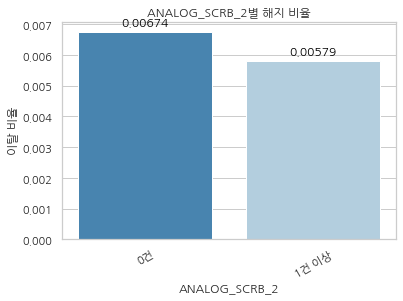

In [ ]:
plot2(df, 'ANALOG_SCRB_2')

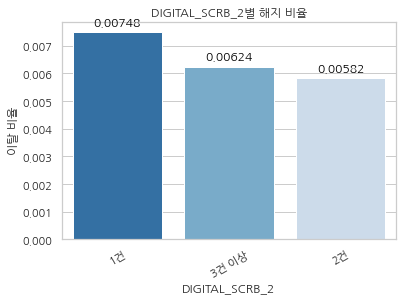

In [ ]:
plot2(df, 'DIGITAL_SCRB_2')

### feature importance

In [ ]:
num

['TOTAL_USED_DAYS',
 'TV_SCRB',
 'ANALOG_SCRB',
 'DIGITAL_SCRB',
 'TOTAL_INTERNET_SCRB',
 'GIGA_INTERNET_SCRB',
 'TV_I_CNT',
 'CH_HH_AVG_MONTH1',
 'KIDS_USE_PV_MONTH1',
 'KIDS_VOD_CNT_MONTH1',
 'TOT_AMT_MONTH1',
 'TOT_AMT_3MM']

In [ ]:
cat

['SVC_USE_DAYS_GRP',
 'MEDIA_NM_GRP',
 'PROD_NM_GRP',
 'PROD_OLD_YN',
 'AGMT_KIND_NM',
 'STB_RES_1M_YN',
 'SVOD_SCRB_CNT_GRP',
 'PAID_CHNL_SCRB_CNT_GRP',
 'SCRB_PATH_NM_GRP',
 'AGMT_END_SEG',
 'AGMT_END_YMD',
 'BUNDLE_YN',
 'DIGITAL_GIGA_YN',
 'DIGITAL_ALOG_YN',
 'VOC_TOTAL_MONTH1_YN',
 'EMAIL_RECV_CLS_NM',
 'SMS_SEND_CLS_NM',
 'CH_TMS_1_2_INCREASE_YN',
 'CH_FAV_RANK1',
 'KIDS_USE_YN_MONTH1',
 'NFX_USE_YN',
 'YTB_USE_YN',
 'canel_yn']

In [ ]:
df_raw = df.copy()

# # 나이 변수 범주화
# df_raw['Age_Category'] = pd.cut(df_raw['Customer_Age'], bins = [25, 35, 45, 55, np.inf], labels=['26~35', '36~45', '46~55', '56~'])
# df_raw.drop(['Customer_Age'], axis=1, inplace = True)

# 범주형 변수 원핫인코딩
categorical = ['SVC_USE_DAYS_GRP',
 'MEDIA_NM_GRP',
 'PROD_NM_GRP',
 'PROD_OLD_YN',
 'AGMT_KIND_NM',
 'STB_RES_1M_YN',
 'SVOD_SCRB_CNT_GRP',
 'PAID_CHNL_SCRB_CNT_GRP',
 'SCRB_PATH_NM_GRP',
 'AGMT_END_SEG',
 'AGMT_END_YMD',
 'BUNDLE_YN',
 'DIGITAL_GIGA_YN',
 'DIGITAL_ALOG_YN',
 'VOC_TOTAL_MONTH1_YN',
 'EMAIL_RECV_CLS_NM',
 'SMS_SEND_CLS_NM',
 'CH_TMS_1_2_INCREASE_YN',
 'CH_FAV_RANK1',
 'KIDS_USE_YN_MONTH1',
 'NFX_USE_YN',
 'YTB_USE_YN',
 'canel_yn']
df_raw = pd.get_dummies(df_raw, columns = categorical, prefix = ['SVC_USE_DAYS_GRP',
 'MEDIA_NM_GRP',
 'PROD_NM_GRP',
 'PROD_OLD_YN',
 'AGMT_KIND_NM',
 'STB_RES_1M_YN',
 'SVOD_SCRB_CNT_GRP',
 'PAID_CHNL_SCRB_CNT_GRP',
 'SCRB_PATH_NM_GRP',
 'AGMT_END_SEG',
 'AGMT_END_YMD',
 'BUNDLE_YN',
 'DIGITAL_GIGA_YN',
 'DIGITAL_ALOG_YN',
 'VOC_TOTAL_MONTH1_YN',
 'EMAIL_RECV_CLS_NM',
 'SMS_SEND_CLS_NM',
 'CH_TMS_1_2_INCREASE_YN',
 'CH_FAV_RANK1',
 'KIDS_USE_YN_MONTH1',
 'NFX_USE_YN',
 'YTB_USE_YN',
 'canel_yn'], drop_first = True)

NameError: name 'df' is not defined

In [ ]:
# df_raw로 진행

scaled_df_raw_X = run_scale('minmax', df_raw_X)

rf_raw = RandomForestClassifier(random_state = 55)
rf_raw.fit(scaled_df_raw_X, df_raw_y)

ftr_importances_values = rf_raw.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = df_raw_X.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
sns.barplot(x = ftr_importances, y = ftr_importances.index)